# Course Description
One of the primary goals of any scientist is to find patterns in data and build models to describe, predict, and extract insight from those patterns. The most fundamental of these patterns is a linear relationship between two variables. This course provides an introduction to exploring, quantifying, and modeling linear relationships in data, by demonstrating techniques
such as least-squares, linear regression, estimatation, and bootstrap resampling. Here you will apply the most powerful modeling tools in the python data science ecosystem, including scipy, statsmodels, and scikit-learn, to build and evaluate linear models. By exploring the concepts and applications of linear models with python, this course serves as both a practical
introduction to modeling, and as a foundation for learning more advanced modeling techniques and tools in statistics and machine learning.

> Chapters
1. Exploring Linear Trends
2. Building Linear Models
3. Making Model Predictions
4. Estimating Model Parameters

In [286]:
from IPython.display import HTML, Image

from sklearn.linear_model import LinearRegression
from scipy import optimize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1. Exploring Linear Trends
We start the course with an initial exploration of linear relationships, including some motivating examples of how linear models are used, and demonstrations of data visualization methods from matplotlib. We then use descriptive statistics to quantify the shape of our data and use correlation to quantify the strength of linear relationships between two variables.

## 1.1 Introduction to Modeling Data

In [42]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/01-Introduction_to_Modeling_Data.mp4" type="video/mp4">
</video>

### Example Trip Data

![][00_Trip]


### Visualizing a Model

![][01_Model]

### Interpolation

![][02_Interpolation]

### Extrapolation

![][03_Extrapolation]

[00_Trip]: _Docs/00_Trip.png
[01_Model]: _Docs/01_Model.png
[02_Interpolation]: _Docs/02_Interpolation.png
[03_Extrapolation]: _Docs/03_Extrapolation.png

### 1.1.1 Reasons for Modeling: Interpolation
One common use of modeling is interpolation to determine a value "inside" or "in between" the measured data points. In this exercise, you will make a prediction for the value of the dependent variable `distances` for a given independent variable `times` that falls "in between" two measurements from a road trip, where the distances are those traveled for the given elapse times.

In [3]:
times, distances = [0.0,1.0,2.0,3.0,4.0,5.0,6.0], [0.,44.04512153,107.16353484,148.43674052,196.39705633,254.4358147,300.]

In [5]:
# Compute the total change in distance and change in time
total_distance = distances[-1] - distances[0]
total_time = times[-1] - times[0]

# Estimate the slope of the data from the ratio of the changes
average_speed = total_distance / total_time

# Predict the distance traveled for a time not measured
elapse_time = 2.5
distance_traveled = average_speed * elapse_time
print("The distance traveled is {}".format(distance_traveled))

The distance traveled is 125.0


### 1.1.2 Reasons for Modeling: Extrapolation
Another common use of modeling extrapolation to estimate data values *"outside"* or *"beyond"* the range (min and max values of `time`) of the measured data. In this exercise, we have measured distances for times 0 through 5 hours, but we are interested in estimating how far we'd go in 8 hours. Using the same data set from the previous exercise, we have prepared a linear model `distance = model(time)`. Use that `model()` to make a prediction about the distance traveled for a time much larger than the other times in the measurements.

In [7]:
def model(time, p_times = times, p_distances = distances):
    total_distance = p_distances[-1] - p_distances[0]
    total_time = p_times[-1] - p_times[0]

    # Estimate the slope of the data from the ratio of the changes
    average_speed = total_distance / total_time

    # Predict the distance traveled for a time not measured
    distance_traveled = average_speed * time
    
    return distance_traveled

In [8]:
# Select a time not measured.
time = 8

# Use the model to compute a predicted distance for that time.
distance = model(time)

# Inspect the value of the predicted distance traveled.
print(distance)

# Determine if you will make it without refueling.
answer = (distance <= 400)
print(answer)

400.0
True


###  1.1.3 Reasons for Modeling: Estimating Relationships
Another common application of modeling is *to compare two data sets* by building models for each, and then *comparing the models*. In this exercise, you are given data for a road trip two cars took together. The cars stopped for gas every 50 miles, but each car did not need to fill up the same amount, because the cars do not have the same fuel efficiency (MPG). Complete the function `efficiency_model(miles, gallons)` to estimate efficiency as average miles traveled per gallons of fuel consumed. Use the provided dictionaries `car1` and `car2`, which both have keys `car['miles']` and `car['gallons']`.

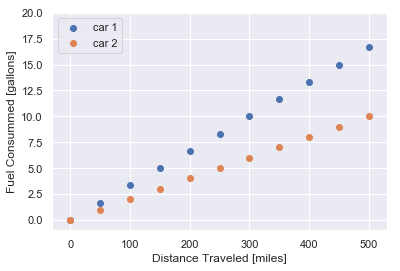

In [52]:
car1 = {'gallons': np.array([0.,1.66666667,3.33333333,5.,6.66666667,8.33333333,10.,11.66666667,13.33333333,15.,16.66666667]),
        'miles': np.array([0.,50.,100.,150.,200.,250.,300.,350.,400.,450.,500.])
       }
car2 = {'gallons': np.array([0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
        'miles': np.array([0.,50.,100.,150.,200.,250.,300.,350.,400.,450.,500.])
       }

miles = car1.get('miles')
plt.scatter(miles,car1['gallons'], label='car 1')
plt.scatter(miles,car2['gallons'], label='car 2')

plt.ylim(-1, 20);
plt.xlabel('Distance Traveled [miles]')
plt.ylabel('Fuel Consummed [gallons]');
plt.legend(loc='upper left')
plt.show()

In [53]:
# Complete the function to model the efficiency.
def efficiency_model(miles, gallons):
   return np.mean( np.nan_to_num(miles / gallons) )

# Use the function to estimate the efficiency for each car.
car1['mpg'] = efficiency_model( car1['miles'] , car1['gallons'] )
car2['mpg'] = efficiency_model( car2['miles'] , car2['gallons'] )

# Finish the logic statement to compare the car efficiencies.
if car1['mpg'] > car2['mpg'] :
    print('car1 is the best')
elif car1['mpg'] < car2['mpg'] :
    print('car2 is the best')
else:
    print('the cars have the same efficiency')

car2 is the best


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


# 1.2 Visualizing Linear Relationships

In [55]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/02-Visualizing_Linear_Relationships.mp4" type="video/mp4">
</video>

### Visualizing Linear Data

![][04_LinearData]
- two points:
    - (x1,y1) = (0,0)
    - (x2,y2) = (2,3)
- change in x and y:
    - dy = (y2 - y1) = 3 - 0
    - dx = (x2 - x1) = 2 - 0
- slope = rise-over-run
    - slope = dy/dx = 3/2
- intercept:
    - when x=0, y=?
    
[04_LinearData]: _Docs/04_LinearData.png

### 1.2.1 Plotting the Data
Everything in python is an object, even modules. Your goal in this exercise is to review the use of the object oriented interfaces to the python library `matplotlib` in order to visualize measured data in a more flexible and extendable work flow. The general plotting work flow looks like this:

```Python
import matplotlib.pyplot as plt 
fig, axis = plt.subplots()
axis.plot(x, y, color="green", linestyle="--", marker="s")
plt.show()
```

In [57]:
times     = np.array([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
distances = np.array([0.25,0.93,2.32,3.76,3.88,4.88,6.79,7.38,7.77,9.27,9.77])

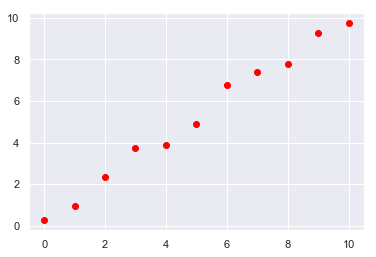

In [58]:
# Create figure and axis objects using subplots()
fig, axis = plt.subplots()

# Plot line using the axis.plot() method
line = axis.plot(times , distances , linestyle=" ", marker="o", color="red")

# Use the plt.show() method to display the figure
plt.show()

Notice how `linestyle=' '` means no line at all, just markers. Also note that your plot style is different than the context figure.

### 1.2.2 Plotting the Model on the Data
Continuing with the same measured data from the previous exercise, your goal is to use a predefined `model()` and measured data `times` and `measured_distances` to compute modeled distances, and then plot both measured and modeled data on the same axis.

In [102]:
def model(p_times, p_distances):
    total_distance = p_distances[-1] - p_distances[0]
    total_time = p_times[-1] - p_times[0]

    # Estimate the slope
    slope = total_distance / total_time

    # Predict 
    return slope * p_times

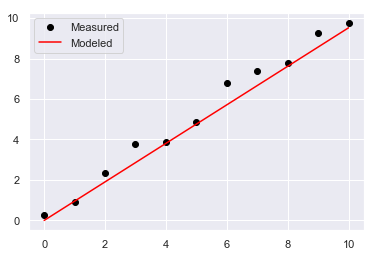

In [106]:
# Pass times and measured distances into model
model_distances = model(times, distances)

# Create figure and axis objects and call axis.plot() twice to plot data and model distances versus times
fig, axis = plt.subplots()
axis.plot(times, distances, linestyle=" ", marker="o", color="black", label="Measured")
axis.plot(times, model_distances, linestyle="-", marker=None, color="red", label="Modeled")

# Add grid lines and a legend to your plot, and then show to display
axis.grid(True)
axis.legend(loc="best")
plt.show()

## 1.3 Quantifying Linear Relationships


In [108]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/03-Quantifying_Linear_Relationships.mp4" type="video/mp4">
</video>

### Pre-Visualization

![][05_correlation]

### Review of Single Variable Statistics

```Python
# Mean
mean = sum(x)/len(x)

# Deviation, sometimes called "centering"
dx = x - np.mean(x)

# Variance
variance = np.mean(dx*dx)

# Standard Deviation
stdev = np.sqrt(variance)
``` 

### Covariance

```Python
# deviations of two variables
dx = x - np.mean(x)
dy = y - np.mean(y)

# co-vary means to vary together
deviation_products = dx*dy

# covariance as the mean
covariance = np.mean(dx*dy)
``` 

### Correlation

```Python
# divide deviations by standard deviation
zx = dx/np.std(x)
zy = dy/np.std(y)
# mean of the normalize deviations
correlation = np.mean(zx*zy)
```

### Normalization: Before

![][06_normalization_before]

### Normalization: After

![][07_normalization_after]

### Magnitude versus Direction

- Correlation values: -1 to +1

![][08_correlation]

[05_correlation]: _Docs/05_correlation.png
[06_normalization_before]: _Docs/06_normalization_before.png
[07_normalization_after]: _Docs/07_normalization_after.png
[08_correlation]: _Docs/08_correlation.png

### 1.3.1 Mean, Deviation, & Standard Deviation
The mean describes the center of the data. The standard deviation describes the spread of the data. But to compare two variables, it is convenient to normalize both. In this exercise, you are provided with two arrays of data, which are highly correlated, and you will compute and visualize the normalized deviations of each array.

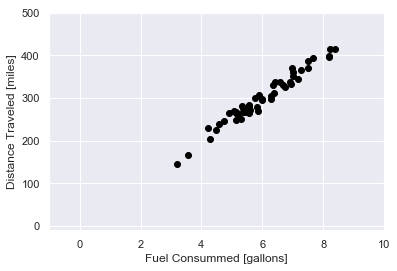

In [114]:
x = np.array([3.20141089,3.57332076,4.2284669,4.27233051,4.49370529,4.5713193,4.74611933,4.9143694,5.06416613,5.12046366,5.1332596,5.1382451,5.19463348,5.30012277,5.32111385,5.361098,5.3622485,5.42139975,5.55601804,5.56564872,5.57108737,5.60910021,5.74438063,5.82636432,5.85993128,5.90529103,5.98816951,6.00284592,6.2829785,6.28362732,6.33858905,6.3861864,6.41291216,6.57380586,6.68822271,6.73736858,6.9071052,6.92746243,6.97873601,6.99734545,7.0040539,7.17582904,7.26593626,7.49073203,7.49138963,7.65143654,8.18678609,8.20593008,8.23814334,8.39236527])
y = np.array([146.48264883,167.75876162,229.73232314,205.23686657,224.99693822,239.79378267,246.65838372,264.14477475,268.91257002,267.25180588,248.54953839,265.25831322,263.03153004,251.08035094,280.93733241,276.53088378,268.59007072,268.62252076,265.21874,280.37743899,283.47297931,271.72788298,299.42217399,279.79758387,270.70401032,306.18168601,295.17313188,298.81898515,305.35499931,297.3187572,330.10944498,312.07619563,338.08560914,337.16702908,331.10617501,325.46645358,337.66440893,333.64162871,370.85149057,351.59390525,362.27985309,345.48425572,365.1976818,386.90415177,371.05186831,393.39852867,397.95134137,395.98005292,415.89087335,415.63691073])

plt.scatter(x,y, color='black')

plt.ylim(-10, 500);
plt.xlim(-1, 10);
plt.ylabel('Distance Traveled [miles]')
plt.xlabel('Fuel Consummed [gallons]')
plt.show()

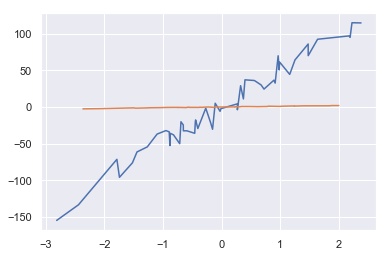

In [130]:
# Compute the deviations by subtracting the mean offset
dx = x - np.mean(x)
dy = y - np.mean(y)

# Normalize the data by dividing the deviations by the standard deviation
zx = dx / np.std(x)
zy = dy / np.std(y)

# Plot comparisons of the raw data and the normalized data
plt.plot(dx,dy)
plt.plot(zx,zy)
plt.show()

# 2. Building Linear Models
Here we look at the parts that go into building a linear model. Using the concept of a Taylor Series, we focus on the parameters slope and intercept, how they define the model, and how to interpret the them in several applied contexts. We apply a variety of python modules to find the model that best fits the data, by computing the optimal values of slope and intercept, using least-squares, numpy, statsmodels, and scikit-learn.

## 2.1 What makes a model linear

In [132]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/04-What_makes_a_model_linear.mp4" type="video/mp4">
</video>

### Taylor Series
Things to know:
1. approximate any curve
2. polynomial form: $y = a0 + a1*x + a2*x**2 + a3*x**3 + .... + an*x**n$
3. often, first order is enough: $y = a0 + a1*x$

### Over-fitting

![][10_First_Order]
![][11_Higher_Order]
![][09_Over-fitting]

[09_Over-fitting]: _Docs/09_Over-fitting.png
[10_First_Order]:_Docs/10_First_Order.png
[11_Higher_Order]: _Docs/11_Higher_Order.png

### 2.1.2 Model Components
In this exercise, you will implement a model function that returns model values for y, computed from input x data, and any input coefficients for the "zero-th" order term a0, the "first-order" term a1, and a quadratic term a2 of a model. Recall that "first order" is linear, so we'll set the defaults for this general linear model with a2=0, but later, we will change this for comparison.

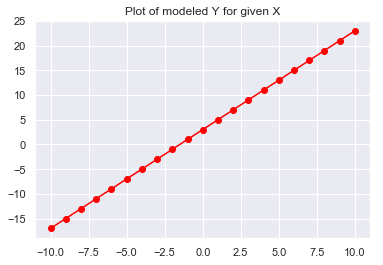

In [138]:
# Define the general model as a function
def model(x, a0=3, a1=2, a2=0):
    return a0 + (a1*x) + (a2*x*x)

# Generate array x, then predict ym values for specific, non-default a0 and a1
x = np.linspace(-10, 10, 21)
ym = model(x)

# Plot the results, ym versus x
plt.plot(x, ym, marker='o', color='red')
plt.title('Plot of modeled Y for given X')
plt.show()

### 2.1.2 Model Parameters
Now that you've built a ***general model***, let's "optimize" or "fit" it to a new (preloaded) measured data set, `xd`, `yd`, by **finding** the specific values for model parameters `a0`, `a1` for which the model data and the measured data line up on a plot.

This is an iterative visualization strategy, where we start with a guess for model parameters, pass them into the `model()`, over-plot the resulting modeled data on the measured data, and visually check that the line passes through the points. If it doesn't, we change the model parameters and try again.

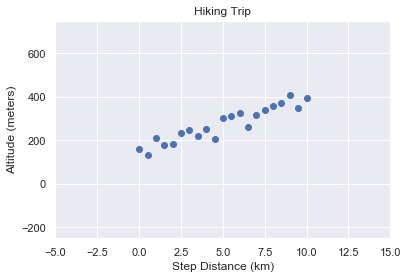

In [176]:
xd=np.array([0.,0.5,1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5,6.,6.5,7.,7.5,8.,8.5,9.,9.5,10.])
yd=np.array([161.78587909,132.72560763,210.81767421,179.6837026,181.98528167,234.67907351,246.48971034,221.58691239,250.3924093,206.43287615,303.75089312,312.29865056,323.8331032,261.9686295,316.64806585,337.55295912,360.13633529,369.72729852,408.0289548,348.82736117,394.93384188])

def plot_data(x,y):
    
    fig, axis = plt.subplots()
    
    axis.scatter(x,y)
    plt.xlim(-5,15)
    plt.ylim(-250,750)
    plt.title('Hiking Trip')
    plt.xlabel('Step Distance (km)')
    plt.ylabel('Altitude (meters)')
    return fig
    
fig = plot_data(xd,yd)

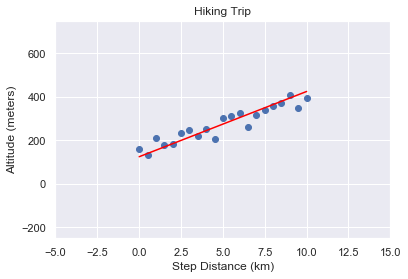

In [177]:
# Complete the plotting function definition
def plot_data_with_model(xd, yd, ym):
    fig = plot_data(xd, yd)  # plot measured data
    fig.axes[0].plot(xd, ym, color='red')  # over-plot modeled data
    plt.show()
    return fig

# Select new model parameters a0, a1, and generate modeled `ym` from them.
a0 = 125
a1 = 30
ym = model(xd, a0, a1)

# Plot the resulting model to see whether it fits the data
fig = plot_data_with_model(xd, yd, ym)

Notice again that the measured x-axis data `xd` is used to generate the modeled y-axis data `ym` so to plot the model, you are plotting `ym` vs `xd`, which may seem counter-intuitive at first. But we are modeling the `y` response to a given `x`; we are not modeling `x`.

## 2.2 Interpreting Slope and Intercept

In [178]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/05-Interpreting_Slope_and_Intercept.mp4" type="video/mp4">
</video>

### Reminder: Terminology:
- $y = a0 + a1*x$
- x = independent variable, e.g. time
- y = dependent variable, e.g. distance traveled
- $xp = 10$; $yp = a0 + a1*xp$, "model prediction"

![][12_Intercept]
![][13_Slope]

[12_Intercept]:_Docs/12_Intercept.png
[13_Slope]:_Docs/13_Slope.png

### 2.2.1 Linear Proportionality
The definition of temperature scales is related to the linear expansion of certain liquids, such as mercury and alcohol. Originally, these scales were literally rulers for measuring length of fluid in the narrow marked or "graduated" tube as a proxy for temperature. The alcohol starts in a bulb, and then expands linearly into the tube, in response to increasing temperature of the bulb or whatever surrounds it.

In this exercise, we will explore the conversion between the Fahrenheit and Celsius temperature scales as a demonstration of interpreting slope and intercept of a linear relationship within a physical context.

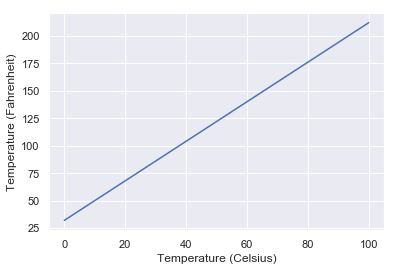

In [185]:
def plot_temperatures(x,y):    
    fig, axis = plt.subplots()    
    axis.plot(x,y)    
    plt.xlabel('Temperature (Celsius)')
    plt.ylabel('Temperature (Fahrenheit)')
    return fig

# Complete the function to convert C to F
def convert_scale(temps_C):
    (freeze_C, boil_C) = (0, 100)
    (freeze_F, boil_F) = (32, 212)
    change_in_C = boil_C - freeze_C
    change_in_F = boil_F - freeze_F
    slope = change_in_F / change_in_C
    intercept = freeze_F - freeze_C
    temps_F = intercept + (slope * temps_C)
    return temps_F

# Use the convert function to compute values of F and plot them
temps_C = np.linspace(0, 100, 101)
temps_F = convert_scale(temps_C)
fig = plot_temperatures(temps_C, temps_F)

### 2.2.2 Slope and Rates-of-Change
In this exercise, you will model the motion of a car driving (roughly) constant velocity by computing the average velocity over the entire trip. The linear relationship modeled is between the time elapsed and the distance traveled.

In this case, the model parameter `a1`, or slope, is approximated or "estimated", as the mean velocity, or put another way, the "rate-of-change" of the distance ("rise") divided by the time ("run").

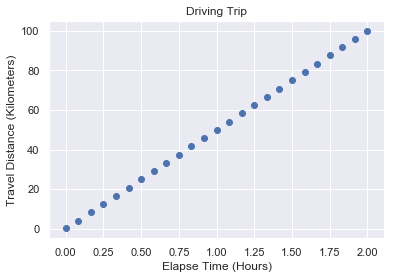

In [192]:
distances=np.array([0.13536211,4.11568697,8.28931902,12.41058595,16.73878397,20.64153844,25.14540098,29.10323276,33.35991992,37.47921914,41.78850899,45.66165494,49.9731319,54.13466214,58.42781412,62.40834239,66.65229765,70.76017847,75.00351781,79.2152346,83.24161507,87.59539364,91.74179923,95.87520786,100.07507133])
times=np.array([0.,0.08333333,0.16666667,0.25,0.33333333,0.41666667,0.5,0.58333333,0.66666667,0.75,0.83333333,0.91666667,1.,1.08333333,1.16666667,1.25,1.33333333,1.41666667,1.5,1.58333333,1.66666667,1.75,1.83333333,1.91666667,2.])

plt.scatter(times,distances)
plt.title('Driving Trip')
plt.xlabel('Elapse Time (Hours)')
plt.ylabel('Travel Distance (Kilometers)')
plt.show()

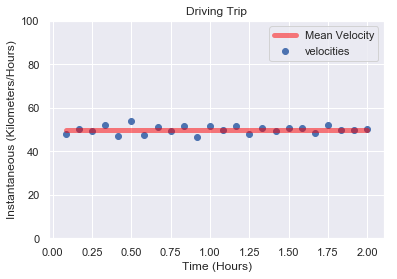

In [215]:
# Compute an array of velocities as the slope between each point
diff_distances = np.diff(distances)
diff_times = np.diff(times)
velocities = diff_distances / diff_times

# Chracterize the center and spread of the velocities
v_avg = np.mean(velocities)
v_max = np.max(velocities)
v_min = np.min(velocities)
v_range = v_max - v_min

# Plot the distribution of velocities
#fig = plot_velocity_timeseries(times[1:], velocities)
plt.scatter(times[1:],velocities, label='velocities')
plt.plot(times[1:],np.full(times[1:].shape,v_avg), label='Mean Velocity', color = 'red', alpha=0.5, linewidth=5)
plt.ylim(0,100)
plt.title('Driving Trip')
plt.xlabel('Time (Hours)')
plt.ylabel('Instantaneous (Kilometers/Hours)')
plt.legend()
plt.show()

Generally we might use the average velocity as the slope in our model. But notice that there is some random variation in the instantaneous velocity values when plotted as a time series. The range of values `v_max - v_min` is one measure of the scale of that variation, and the standard deviation of velocity values is another measure. We see the implications of this variation in a model parameter in the next chapter of this course when discussing inference.

### 2.2.3 Intercept and Starting Points
In this exercise, you will see the intercept and slope parameters in the context of modeling measurements taken of the volume of a solution contained in a large glass jug. The solution is composed of composed of water, grains, sugars, and yeast. The total mass of both the solution and the glass container was also recorded, but the empty container mass was not noted.

Your job is to use the preloaded pandas DataFrame `df`, with data columns `volumes` and `masses` to build a linear model that relates the `masses` (y-data) to the `volumes` (x-data). The slope will be an estimate of the density (change in mass / change in volume) of the solution, and the intercept will be an estimate of the empty container weight (mass when volume=0).

In [221]:
df = pd.read_csv('_datasets/solution_data.csv',skiprows=5)
df.head()

,volumes,masses
0,2.0,7.812435
1,2.1,7.698824
2,2.2,7.817183
3,2.3,7.872703
4,2.4,8.176541


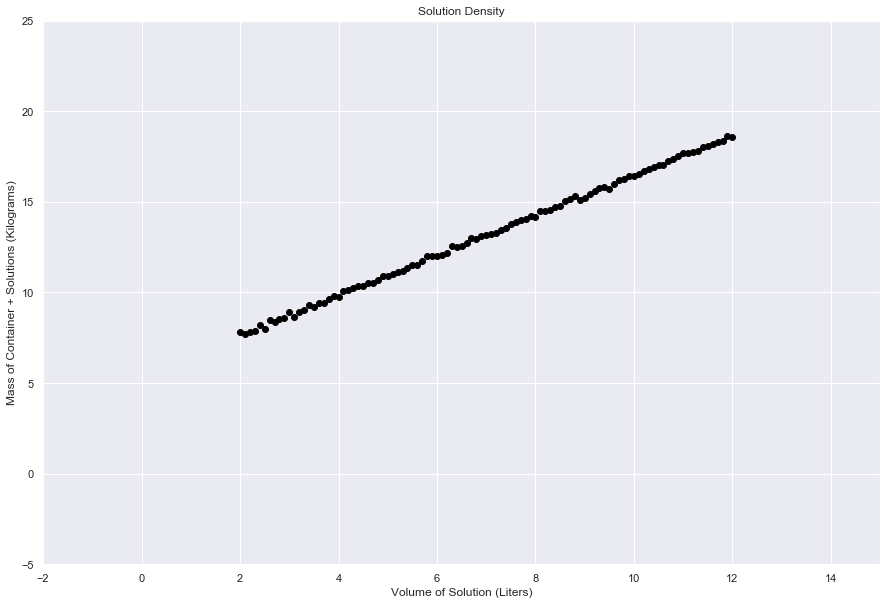

In [238]:
plt.figure(figsize=(15,10))
plt.scatter(df.volumes,df.masses, color = 'black')
plt.xlim(-2,15)
plt.ylim(-5,25)
plt.title('Solution Density')
plt.xlabel('Volume of Solution (Liters)')
plt.ylabel('Mass of Container + Solutions (Kilograms)')
plt.show()

In [240]:
# Import ols from statsmodels, and fit a model to the data
from statsmodels.formula.api import ols
model_fit = ols(formula="masses ~ volumes", data=df)
model_fit = model_fit.fit()

# Extract the model parameter values, and assign them to a0, a1
a0 = model_fit.params['Intercept']
a1 = model_fit.params['volumes']

# Print model parameter values with meaningful names, and compare to summary()
print( "container_mass   = {:0.4f}".format(a0) )
print( "solution_density = {:0.4f}".format(a1) )
print( model_fit.summary() )

container_mass   = 5.4349
solution_density = 1.1029
                            OLS Regression Results                            
Dep. Variable:                 masses   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.328e+05
Date:                Sat, 25 May 2019   Prob (F-statistic):          1.19e-156
Time:                        23:08:16   Log-Likelihood:                 102.39
No. Observations:                 101   AIC:                            -200.8
Df Residuals:                      99   BIC:                            -195.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


## 2.3 Model Optimization

In [242]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/06-Model_Optimization.mp4" type="video/mp4">
</video>

### Residuals

- To quantify the overall difference, we sum the residuals, but be carefull negative and positive values can cancel themselves.
![][14_Residuals]

### Residuals squared (RSS)

- It's better becasuse
    - Values will always be positive, so there no is a chance of cancel themselves.
    - Larger residuals gets penalized
    
![][15_RSS]
![][15_Minimun_RSS]

[14_Residuals]:_Docs/14_Residuals.png
[15_RSS]:_Docs/15_RSS.png
[15_Minimun_RSS]:_Docs/15_Minimun_RSS.png

### 2.3.1 Residual Sum of the Squares
In a previous exercise, we saw that the altitude along a hiking trail was roughly fit by a linear model, and we introduced the concept of **differences** between the model and the data as a **measure of model goodness**.

In this exercise, you'll work with the same measured data, and quantifying how well a model fits it by computing the sum of the square of the "differences", also called "residuals".

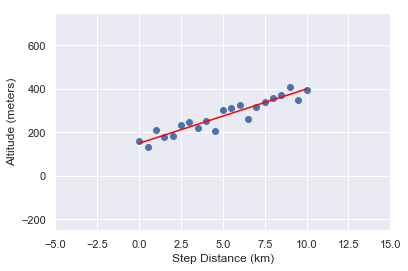

In [253]:
def load_data():
    xd=np.array([0.,0.5,1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5,6.,6.5,7.,7.5,8.,8.5,9.,9.5,10.])
    yd=np.array([161.78587909,132.72560763,210.81767421,179.6837026,181.98528167,234.67907351,246.48971034,221.58691239,250.3924093,206.43287615,303.75089312,312.29865056,323.8331032,261.9686295,316.64806585,337.55295912,360.13633529,369.72729852,408.0289548,348.82736117,394.93384188])
    return xd,yd

def plot_data(x,y):
    
    fig, axis = plt.subplots()    
    axis.scatter(x,y)
    plt.xlim(-5,15)
    plt.ylim(-250,750)
    plt.title('Hiking Trip')
    plt.xlabel('Step Distance (km)')
    plt.ylabel('Altitude (meters)')
    return fig
    
# Complete the plotting function definition
def plot_data_with_model(xd, yd, ym, title=''):
    fig = plot_data(xd, yd)  # plot measured data
    fig.axes[0].plot(xd, ym, color='red')  # over-plot modeled data
    plt.title(title)
    plt.show()
    return fig


xd,yd = load_data()

# Select new model parameters a0, a1, and generate modeled `ym` from them.
a0 = 150
a1 = 25
ym = model(xd, a0, a1)

# Plot the resulting model to see whether it fits the data
fig = plot_data_with_model(xd, yd, ym)

In [250]:
# Load the data
x_data, y_data = load_data()

# Model the data with specified values for parameters a0, a1
y_model = model(x_data, a0=150, a1=25)

# Compute the RSS value for this parameterization of the model
rss = np.sum(np.square(y_data-y_model))
print("RSS = {}".format(rss))

RSS = 14444.484116328082


The value we compute for RSS is not meaningful by itself, but later it becomes meaningful in context when we compare it to other values of RSS computed for other parameterizations of the model. More on that next! Some notes about code style; notice you could have done the RSS calculation in a single line of python code, but writing functions than can be re-used is good practice. Notice also that we could have defined a parameter dictionary `dict(a0=150, a1=25)` and passed it into the model as `model(x, **parameters)` which would make it easier to pass around all the parameters together if we needed them for other functions

### 2.3.2 Minimizing the Residuals
In this exercise, you will complete a function to visually compare model and data, and compute and print the RSS. You will call it more than once to see how RSS changes when you change values for `a0` and `a1`. We'll see that the values for the parameters we found earlier are the ones needed to **minimize** the RSS.

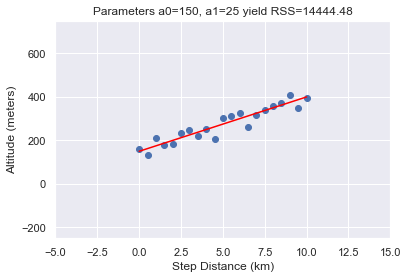

Parameters a0=150, a1=25 yield RSS=14444.48


In [255]:
# Complete function to load data, build model, compute RSS, and plot
def compute_rss_and_plot_fit(a0, a1):
    xd, yd = load_data()
    ym = model(xd, a0, a1)
    residuals = ym - yd
    rss = np.sum(np.square(residuals))
    summary = "Parameters a0={}, a1={} yield RSS={:0.2f}".format(a0, a1, rss)
    fig = plot_data_with_model(xd, yd, ym, summary)
    return rss, summary

# Chose model parameter values and pass them into RSS function
rss, summary = compute_rss_and_plot_fit(a0=150, a1=25)
print(summary)

As stated earlier, the significance of RSS is in context of other values. More specifically, the minimum RSS is of value in identifying the **specific set of parameter values for our model which yield the smallest residuals in an overall sense**.

### 2.3.3 Visualizing the RSS Minima
In this exercise you will compute and visualize how RSS varies for different values of model parameters. Start by holding the intercept constant, but vary the slope: and for each slope value, you'll compute the model values, and the resulting RSS. Once you have an array of RSS values, you will determine minimal RSS value, in code, and from that minimum, determine the slope that resulted in that minimal RSS.

Use pre-loaded data arrays `x_data`, `y_data`, and empty container `rss_list` to get started.

The minimum RSS = 14411.193018382088, came from a1 = [24.8]


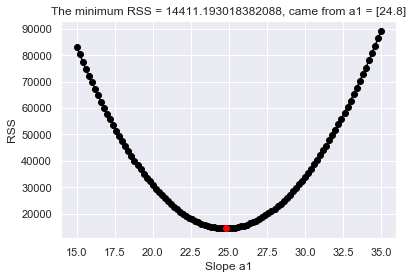

In [280]:
def compute_rss(yd,ym):
    return np.sum(np.square(ym-yd))

rss_list = []
# Loop over all trial values in a1_array, computing rss for each
a1_array = np.linspace(15, 35, 101)
for a1_trial in a1_array:
    y_model = model(x_data, a0=150, a1=a1_trial)
    rss_value = compute_rss(y_data, y_model)
    rss_list.append(rss_value)

# Find the minimum RSS and the a1 value from whence it came
rss_array = np.array(rss_list)
best_rss = np.min(rss_array) 
best_a1 = a1_array[np.where(rss_array==best_rss)]
title = 'The minimum RSS = {}, came from a1 = {}'.format(best_rss, best_a1)
print(title)

# Plot your rss and a1 values to confirm answer
plt.plot(a1_array,rss_array, color='black', marker='o')
plt.plot(best_a1, best_rss, color = 'red', marker='o')
plt.title(title)
plt.xlabel('Slope a1')
plt.ylabel('RSS')
plt.show()

The best slope is the one out of an array of slopes than yielded the minimum RSS value out of an array of RSS values. Python tip: notice that we started with `rss_list` to make it easy to `.append()` but then later converted to `numpy.array()` to gain access to all the numpy methods.

## 2.4 Least-Squares Optimization


In [281]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/07-Least-Squares_Optimization.mp4" type="video/mp4">
</video>

### Minima of RSS
Setting RSS slope = zero, and some calculus, yields:
- $a = covariance(x, y)/variance(x)$
- $a = mean(y) − a × mean(x)$

### 2.4.1 Least-Squares with `numpy`
The formula above are the result of working through the calculus discussed in the introduction. In this exercise, we'll trust that the calculus correct, and implement these formulae in code using numpy.

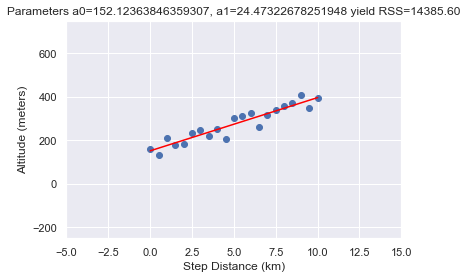

In [284]:
x,y=load_data()
# prepare the means and deviations of the two variables
x_mean = np.sum(x)/len(x)
y_mean = np.sum(y)/len(y)
x_dev = x - x_mean
y_dev = y - y_mean

# Complete least-squares formulae to find the optimal a0, a1
a1 = np.sum(x_dev * y_dev) / np.sum( (x_dev**2) )
a0 = np.mean(y) - (a1 * x_mean)

# Use the those optimal model parameters a0, a1 to build a model
y_model = model(x, a0, a1)

# plot to verify that the resulting y_model best fits the data y
fig, rss = compute_rss_and_plot_fit(a0, a1)

Notice that the optimal slope a1, according to least-squares, is a ratio of the covariance to the variance. Also, note that the values of the parameters obtained here are NOT exactly the ones used to generate the pre-loaded data `(a1=25 and a0=150)`, but they are close to those. Least-squares does not guarantee zero error; there is no perfect solution, but in this case, least-squares is the best we can do

### 2.4.2 Optimization with Scipy
It is possible to write a `numpy` implementation of the **analytic** solution to find the minimal RSS value. **But for more complex models, finding analytic formulae is not possible, and so we turn to other methods.**

In this exercise you will use `scipy.optimize` to employ a more general approach to solve the same optimization problem.

In so doing, you will see additional return values from the method that tell answer us "how good is best". Here we will use the same measured data and parameters as seen in the last exercise for ease of comparison of the new `scipy` approach.

The minimum RSS = 152.12363843931638, came from a1 = 24.473226785099204


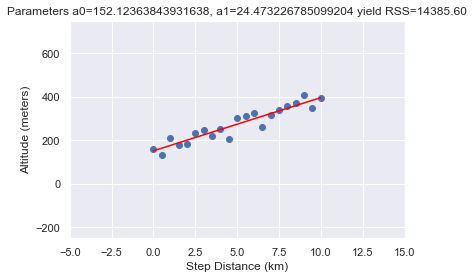

In [288]:
# Define a model function needed as input to scipy
def model_func(x, a0, a1):
    return a0 + (a1*x)

# Load the measured data you want to model
x_data, y_data  = load_data()

# call curve_fit, passing in the model function and data; then unpack the results
param_opt, param_cov = optimize.curve_fit(model_func, x_data, y_data)
a0 = param_opt[0]  # a0 is the intercept in y = a0 + a1*x
a1 = param_opt[1]  # a1 is the slope     in y = a0 + a1*x
title = 'The minimum RSS = {}, came from a1 = {}'.format(a0, a1)
print(title)


# test that these parameters result in a model that fits the data
fig, rss = compute_rss_and_plot_fit(a0, a1)

Notice that we passed the function object itself, `model_func` into `curve_fit`, rather than passing in the model data. The model function object was the input, because the optimization wants to know what form in general it's solve for; had we passed in a model_func with more terms like an `a2*x**2` term, we would have seen different results for the parameters output

### 2.4.3 Least-Squares with `statsmodels`
Several python libraries provide convenient abstracted interfaces so that you need not always be so explicit in handling the machinery of optimization of the model.

As an example, in this exercise, you will use the `statsmodels` library in a more high-level, generalized work-flow for building a model using least-squares optimization (minimization of RSS).

To help get you started, we've pre-loaded the data from `x_data, y_data = load_data()` and stored it in a pandas DataFrame with column names `x_column` and `y_column` using `df = pd.DataFrame(dict(x_column=x_data, y_column=y_data))`

In [291]:
x_data, y_data = load_data()
df = pd.DataFrame(dict(x_column=x_data, y_column=y_data))

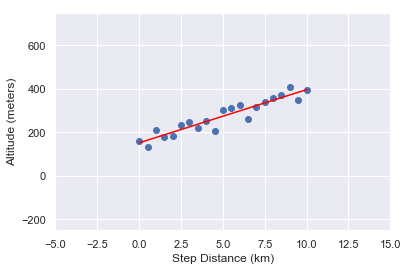

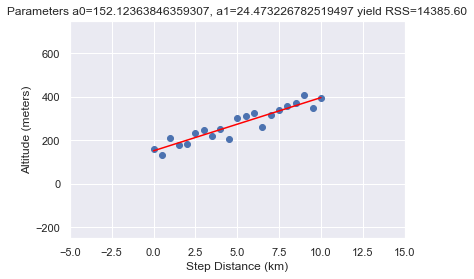

In [296]:
# Pass data and `formula` into ols(), use and `.fit()` the model to the data
model_fit = ols(formula="y_column ~ x_column", data=df).fit()

# Use .predict(df) to get y_model values, then over-plot y_data with y_model
y_model = model_fit.predict(df)
fig = plot_data_with_model(x_data, y_data, y_model)

# Extract the a0, a1 values from model_fit.params
a0 = model_fit.params['Intercept']
a1 = model_fit.params['x_column']

# Visually verify that these parameters a0, a1 give the minimum RSS
fig, rss = compute_rss_and_plot_fit(a0, a1)

# 3. Making Model Predictions
Next we will apply models to real data and make predictions. We will explore some of the most common pit-falls and limitations of predictions, and we evaluate and compare models by quantifying and contrasting several measures of goodness-of-fit, including RMSE and R-squared.

## 3.1 Modeling Real Data

In [297]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/08-Modeling_Real_Data.mp4" type="video/mp4">
</video>

### 3.1.1 Linear Model in Anthropology
If you found part of a skeleton, from an adult human that lived thousands of years ago, how could you estimate the height of the person that it came from? This exercise is in part inspired by the work of forensic anthropologist Mildred Trotter, who built a regression model for the calculation of stature estimates from human "long bones" or femurs that is commonly used today.

In this exercise, you'll use data from many living people, and the python library `scikit-learn`, to build a linear model relating the length of the femur (thigh bone) to the "stature" (overall height) of the person. Then, you'll apply your model to make a prediction about the height of your ancient ancestor.

In [337]:
femur_df = pd.read_csv('_datasets/femur_data.csv')
legs = femur_df.length.values
heights = femur_df.height.values
femur_df.head()

,length,height
0,35.0,145.751662
1,36.5,154.819895
2,38.0,147.451499
3,39.5,154.532704
4,41.0,166.174503


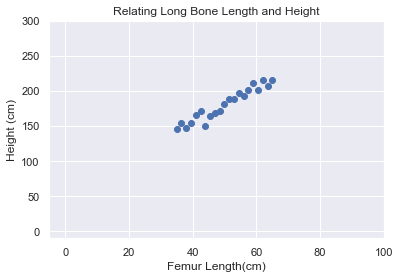

In [338]:
def plot_femur_data(x,y):
    
    fig, axis = plt.subplots()
    axis.scatter(x,y)
    plt.xlim(-5,100)
    plt.ylim(-10,300)
    plt.title('Relating Long Bone Length and Height')
    plt.xlabel('Femur Length(cm)')
    plt.ylabel('Height (cm)')
    return fig

fig = plot_femur_data(legs,heights)

In [339]:
# import the sklearn class LinearRegression and initialize the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)

# Prepare the measured data arrays, Reshape the pre-loaded data arrays legs and heights, from "1-by-N" to "N-by-1" arrays. and fit the model to them
print('legs Shape before reshaping = {}'.format(legs.shape))
legs = legs.reshape(len(heights),1)
print('legs Shape after reshaping = {}'.format(legs.shape))
heights = heights.reshape(len(heights),1)

# Fit the model to them
model.fit(legs, heights)

legs Shape before reshaping = (21,)
legs Shape after reshaping = (21, 1)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [342]:
# Use the fitted model to make a prediction for the found femur
fossil_leg = np.array([[50.7]])
fossil_height = model.predict(fossil_leg)
print("Predicted fossil height = {:0.2f} cm".format(fossil_height[0,0]))

Predicted fossil height = 181.34 cm


### 3.1.2 Linear Model in Oceanography
Time-series data provides a context in which the "slope" of the linear model represents a "rate-of-change".

In this exercise, you will use measurements of sea level change from 1970 to 2010, build a linear model of that changing sea level and use it to make a prediction about the future sea level rise.

In [345]:
sea_level_df = pd.read_csv('_datasets/sea_level_data.csv', skiprows = 6)
sea_level_df.head()

,year,sea_level_inches
0,1970,4.677165
1,1971,4.881890
2,1972,5.240157
3,1973,5.003937
4,1974,5.472441


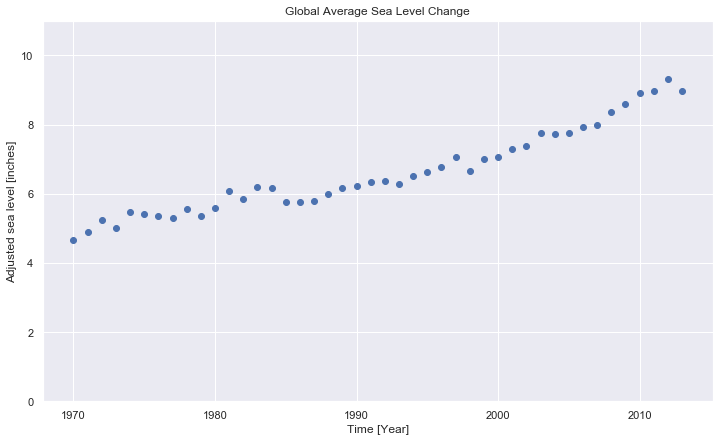

In [382]:
def plot_sea_level_data(x,y):
    
    fig, axis = plt.subplots(figsize=(12, 7))
    axis.scatter(x,y, label='Data')
    #plt.xlim(0,2012)
    plt.ylim(0,11)
    plt.title('Global Average Sea Level Change')
    plt.xlabel('Time [Year]')
    plt.ylabel('Adjusted sea level [inches]')
    return fig

fig = plot_sea_level_data(sea_level_df.year,sea_level_df.sea_level_inches)

In [352]:
years = sea_level_df.year.values.reshape(-1,1)
levels = sea_level_df.sea_level_inches.values.reshape(-1,1)

In [353]:
# Import LinearRegression class, build a model, fit to the data
model = LinearRegression(fit_intercept=True)
model.fit(years, levels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [357]:
# Use model to make a prediction for one year, 2100
future_year = np.array(2100).reshape(-1,1)
future_level = model.predict(future_year)
print("Prediction: year = {}, level = {:.02f}".format(future_year[0,0], future_level[0,0]))

Prediction: year = 2100, level = 16.66


In [385]:
def plot_data_and_forecast(y,l,yf,lf):
    # plot measured data    
    fig = plot_sea_level_data(y,l)
    # over-plot modeled data
    fig.axes[0].plot(yf, lf, color='red', label='Forecast', marker='.')
    plt.ylim(0,20)
    plt.legend()
    plt.show()
    return fig

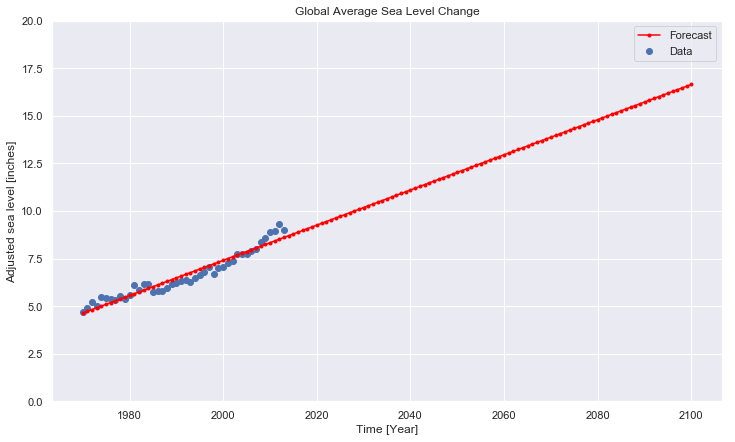

In [386]:
# Use model to predict for many years, and over-plot with measured data
years_forecast = np.linspace(1970, 2100, 131).reshape(-1, 1)
levels_forecast = model.predict(years_forecast)
fig = plot_data_and_forecast(years, levels, years_forecast, levels_forecast)

Note that with scikit-learn, although we could extract `a0 = model.intercept_[0]` and `a1 = model.coef_[0,0]`, we do not need to do that in order to make predictions, we just call `model.predict()`. With more complex models, these parameters may not have easy physical interpretations. Notice also that although our model is linear, **the actual data appears to have an up-turn that might be better modeled by adding a quadratic or even exponential term to our model**. The linear model forecast may be **underestimating the rate of increase in sea level**.

### 3.1.3 Linear Model in Cosmology
Less than 100 years ago, the universe appeared to be composed of a single static galaxy, containing perhaps a million stars. Today we have observations of hundreds of billions of galaxies, each with hundreds of billions of stars, all moving.

The beginnings of the modern physical science of cosmology came with the [publication in 1929 by Edwin Hubble][1] that included use of a linear model.

In this exercise, you will build a model whose slope will give Hubble's Constant, which describes the velocity of galaxies as a linear function of distance from Earth.

[1]: http://www.pnas.org/content/15/3/168

In [388]:
hubble_df = pd.read_csv('_datasets/hubble_data.csv', skiprows = 8)
hubble_df.head()

,names,distances,velocities
0,SMC,0.032,170
1,LMC,0.034,290
2,NGC-221,0.275,-185
3,NGC-224,0.275,-220
4,NGC-598,0.263,-70


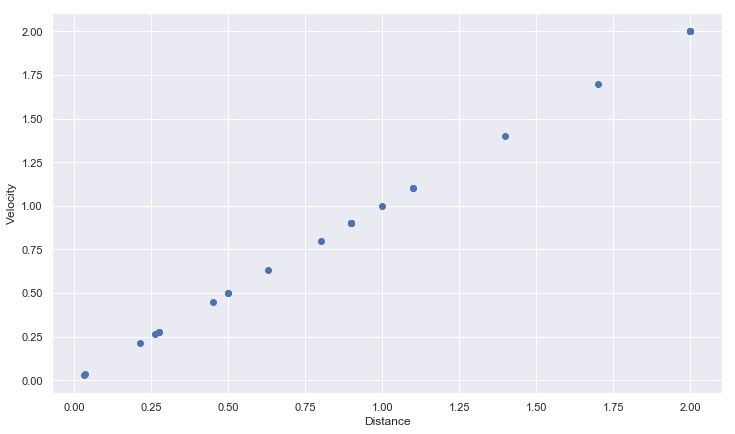

In [390]:
def plot_hubble_data(x,y):
    
    fig, axis = plt.subplots(figsize=(12, 7))
    axis.scatter(x,y, label='Data')
    #plt.xlim(0,2012)
    #plt.ylim(0,11)
    #plt.title('Global Average Sea Level Change')
    plt.xlabel('Distance')
    plt.ylabel('Velocity')
    return fig

fig = plot_hubble_data(hubble_df.distances,hubble_df.distances)

In [392]:
# Fit the model, based on the form of the formula
model_fit = ols(formula="velocities ~ distances", data=hubble_df).fit()

# Extract the model parameters and associated "errors" or uncertainties
a0 = model_fit.params['Intercept']
a1 = model_fit.params['distances']
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['distances']

# Print the results
print('For slope a1={:.02f}, the uncertainty in a1 is {:.02f}'.format(a1, e1))
print('For intercept a0={:.02f}, the uncertainty in a0 is {:.02f}'.format(a0, e0))

For slope a1=454.16, the uncertainty in a1 is 75.24
For intercept a0=-40.78, the uncertainty in a0 is 83.44


Notice the `~` in the `formula` means "similar to" and is interpreted by `statsmodels` to mean that `y ~ x` have a linear relationship. More recently, observed astrophysical data extend the veritical scale of measured data out further by almost a factor of 50. Using this new data to model gives a very different value for the slope, Hubble's Constant, of about `72`. 

## 3.2 The Limits of Prediction


In [393]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/09-The_Limits_of_Prediction.mp4" type="video/mp4">
</video>

### Interpolation

![][16_interpolation]

### Domain of Validity
- zoom in: data looks linear
- model assumption: $a2*x**2 + a3*x**3 + ... = zero$.
- build a linear model: $a0 + a1*x$
- zoom out: your model breaks

![][17_model_breaks]

[16_interpolation]:_Docs/16_interpolation.png
[17_model_breaks]:_Docs/17_model_breaks.png

### 3.2.1 Interpolation: Inbetween Times
In this exercise, you will build a linear model by fitting monthly time-series data for the Dow Jones Industrial Average (DJIA) and then use that model to make predictions for daily data (in effect, an interpolation). Then you will compare that daily prediction to the real daily DJIA data.

A few notes on the data. "OHLC" stands for "Open-High-Low-Close", which is usually daily data, for example the opening and closing prices, and the highest and lowest prices, for a stock in a given day. "DayCount" is an integer number of days from start of the data collection.

In [456]:
def plot_data(x,y,label = '',figsize = (10,7)):
    
    fig, axis = plt.subplots(figsize=figsize)
    
    axis.scatter(x,y, label=label)
    plt.xticks(rotation = 45)
    plt.ylabel('DJIA Close')
    plt.xlabel('Date')
    plt.legend()
    return fig

def plot_model_with_data(df):
    RSS = np.sum(np.square(df.Close.values - df.Model.values))
    fig = plot_data(df.Date, df.Close, 'Monthly')  # plot measured data
    fig.axes[0].plot(df.Date, df.Model, color='red')  # over-plot modeled data
    plt.title('RSS = {0:.1f}'.format(RSS))
    plt.show()
    return fig

In [440]:
df_monthly = pd.read_csv('_datasets/DJIA_monthly.csv', parse_dates=['Date'])
df_monthly.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Jday,DayCount
0,2013-01-01,13104.299805,13969.990234,13104.299805,13860.580078,13860.580078,2786680000,2456293.5,1827.0
1,2013-02-01,13860.580078,14149.150391,13784.009766,14054.490234,14054.490234,2487580000,2456324.5,1858.0
2,2013-03-01,14054.490234,14585.099609,13937.599609,14578.540039,14578.540039,2546320000,2456352.5,1886.0
3,2013-04-01,14578.540039,14887.509766,14434.429688,14839.799805,14839.799805,2920230000,2456383.5,1917.0
4,2013-05-01,14839.799805,15542.400391,14687.049805,15115.570313,15115.570313,2771510000,2456413.5,1947.0


In [445]:
df_daily = pd.read_csv('_datasets/DJIA_daily.csv', parse_dates=['Date'])
df_daily.head()

,Date,Open,High,Low,Close,DayCount
0,2013-01-02,13104.299805,13412.709961,13104.299805,13412.549805,1827.0
1,2013-01-03,13413.009766,13430.599609,13358.299805,13391.360352,1828.0
2,2013-01-04,13391.049805,13447.110352,13376.230469,13435.209961,1829.0
3,2013-01-07,13436.129883,13436.129883,13343.320313,13384.290039,1832.0
4,2013-01-08,13377.419922,13377.419922,13293.129883,13328.849609,1833.0


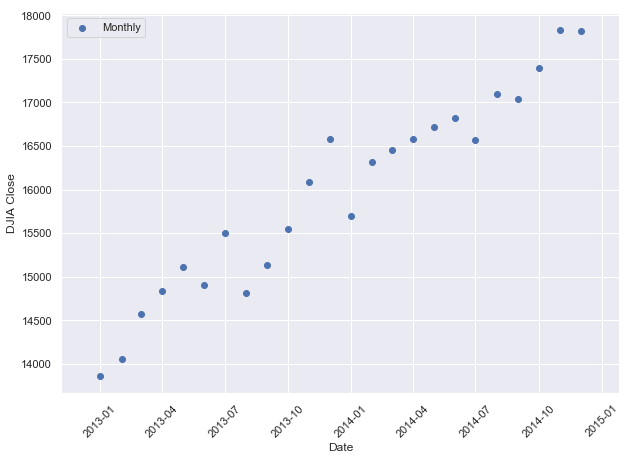

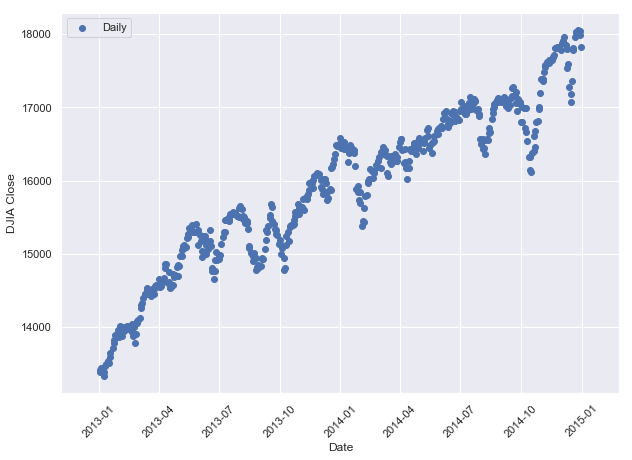

In [451]:
fig = plot_data(df_monthly.Date, df_monthly.Close,'Monthly')
fig = plot_data(df_daily.Date, df_daily.Close, 'Daily')

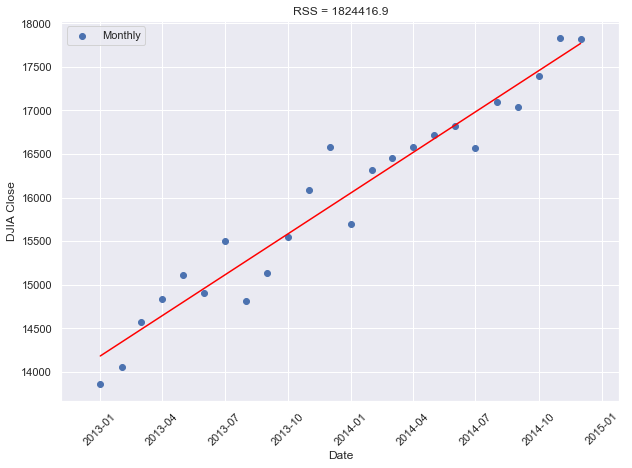

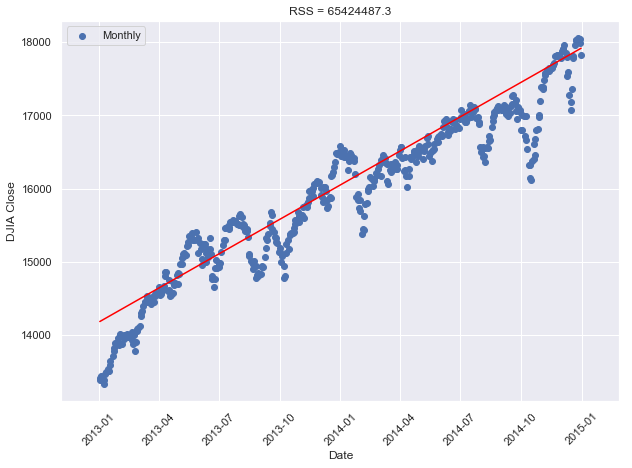

In [458]:
# build and fit a model to the df_monthly data
model_fit = ols('Close ~ DayCount', data=df_monthly).fit()

# Use the model FIT to the MONTHLY data to make a predictions for both monthly and daily data
df_monthly['Model'] = model_fit.predict(df_monthly.DayCount)
df_daily['Model'] = model_fit.predict(df_daily.DayCount)

# Plot the monthly and daily data and model, compare the RSS values seen on the figures
fig_monthly = plot_model_with_data(df_monthly)
fig_daily = plot_model_with_data(df_daily)

Notice the monthly data looked linear, but the daily data clearly has additional, nonlinear trends. **Under-sampled data often misses real-world features in the data on smaller time or spatial scales**. **Using the model from the under-sampled data to make interpolations to the daily data can result is large residuals**. Notice that the **RSS** value for the **daily plot is more than 30 times worse than the monthly plot**

### 3.2.3 Extrapolation: Going Over the Edge
In this exercise, we consider the perils of extrapolation. Shown here is the profile of a hiking trail on a mountain. One portion of the trail, marked in black, looks linear, and was used to build a model. But we see that the best fit line, shown in red, does not fit outside the original "domain", as it extends into this new outside data, marked in blue.

If we want use the model to make predictions for the altitude, but still be accurate to within some tolerance, what are the smallest and largest values of independent variable `x` that we can allow ourselves to apply the model to?"

Here, use the preloaded `x_data`, `y_data`, `y_model`, and `plot_data_model_tolerance()` to complete your solution.

![][17_model_breaks]

[17_model_breaks]:_Docs/17_model_breaks.png

In [473]:
def plot_data(x,y, color = 'blue'):
    
    fig, axis = plt.subplots()
    
    axis.scatter(x,y, label='Data', c = color)
    plt.xlim(-15,25)
    plt.ylim(-250,750)
    plt.title('Hiking Trip')
    plt.xlabel('Step Distance (km)')
    plt.ylabel('Altitude (meters)')
    return fig

def plot_data_with_model(xd, yd, ym):
    fig = plot_data(xd, yd)  # plot measured data
    fig.axes[0].plot(xd, ym, color='red', label='Model')  # over-plot modeled data
    plt.legend()
    plt.show()    
    return fig

def plot_data_model_tolerance(xd, yd, ym, tolerance):
    fig = plot_data(xd, yd, tolerance)  # plot measured data
    fig.axes[0].plot(xd, ym, color='red', label='Model')  # over-plot modeled data
    plt.legend()
    plt.show()    
    return fig

In [460]:
x_data  = np.array([-10.,-9.5,-9.,-8.5,-8.,-7.5,-7.,-6.5,-6.,-5.5,-5.,-4.5,-4.,-3.5,-3.,-2.5,-2.,-1.5,-1.,-0.5,0.,0.5,1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5,6.,6.5,7.,7.5,8.,8.5,9.,9.5,10.,10.5,11.,11.5,12.,12.5,13.,13.5,14.,14.5,15.,15.5,16.,16.5,17.,17.5,18.,18.5,19.,19.5,20.])
y_data  = np.array([73.33885174,91.52854842,41.87555998,103.06980499,77.57108039,99.70512917,106.70722978,128.26034956,117.88171452,136.65021987,82.60474807,86.82566796,122.477045,114.41893877,127.63451229,143.2255083,136.61217437,154.76845765,182.39147012,122.51909166,161.78587909,132.72560763,210.81767421,179.6837026,181.98528167,234.67907351,246.48971034,221.58691239,250.3924093,206.43287615,303.75089312,312.29865056,323.8331032,261.9686295,316.64806585,337.55295912,360.13633529,369.72729852,408.0289548,348.82736117,394.93384188,366.03460828,374.7693763,371.26981466,377.88763074,320.70120977,336.82269401,262.00816122,290.35612838,308.90807157,259.98783618,265.86978322,271.12330621,258.58229827,241.52677418,204.38155251,198.05166573,174.36397174,190.97570971,217.20785477,146.83883158])
y_model = np.array([-100.,-87.5,-75.,-62.5,-50.,-37.5,-25.,-12.5,0.,12.5,25.,37.5,50.,62.5,75.,87.5,100.,112.5,125.,137.5,150.,162.5,175.,187.5,200.,212.5,225.,237.5,250.,262.5,275.,287.5,300.,312.5,325.,337.5,350.,362.5,375.,387.5,400.,412.5,425.,437.5,450.,462.5,475.,487.5,500.,512.5,525.,537.5,550.,562.5,575.,587.5,600.,612.5,625.,637.5,650.])

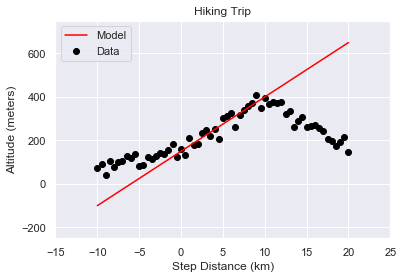

In [471]:
fig = plot_data_with_model(x_data,y_data,y_model)

In [478]:
# Compute the residuals, "data - model", and determine where [residuals < tolerance]
residuals = np.abs(y_model - y_data)
tolerance = 100
x_good = x_data[residuals < tolerance]

# Find the min and max of the "good" values, and plot y_data, y_model, and the tolerance range
print('Minimum good x value = {}'.format(np.min(x_good)))
print('Maximum good x value = {}'.format(np.max(x_good)))
#fig = plot_data_model_tolerance(x_data, y_data, y_model, tolerance)

Minimum good x value = -5.0
Maximum good x value = 12.0


![][18_tolerance]

Notice the range of good values, which extends a little out into the new data, is marked in green on the plot. By comparing the residuals to a tolerance threshold, we can quantify how far out out extrapolation can go before the difference between model and data gets too large.

[18_tolerance]:_Docs/18_tolerance.png

## 3.3 Goodness-of-Fit


In [480]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/10-Goodness-of-Fit.mp4" type="video/mp4">
</video>

### 3 Different R's
Building Models:
- RSS
Evaluating Models:
- RMSE: How much the model deviates from the data
    > ```Python 
    residuals = y_model - y_data
    RSS = np.sum( np.square(residuals) )
    ```    
    ```Python 
    mean_squared_residuals = np.sum( np.square(residuals) ) / len(residuals)
    ```    
    ```Python 
    MSE = np.mean( np.square(residuals) )
    ```    
    ```Python 
    RMSE = np.sqrt(np.mean( np.square(residuals)))
    ```
    ```Python 
    RMSE = np.std(residuals)
    ```
- R-squared
    - Deviations:
        > ```Python
        deviations = np.mean(y_data) - y_data
        VAR = np.sum(np.square(deviations))
        ```
    - Residuals:
        > ```Python
        residuals = y_model - y_data
        RSS = np.sum(np.square(residuals))
        ```
    - R-squared:
        > ```Python
        r_squared = 1 - (RSS / VAR)
        r = correlation(y_data, y_model)
        ```
        
### R-Squared in Data

![][R-Squared]

### RMSE vs R-Squared
- RMSE: how much variation is residual
- R-squared: what fraction of variation is linear

[R-Squared]:_Docs/R-Squared.gif


[What is the difference between RMSE and R squared in statistics?][1]

Both these measures are widely used for finding out the accuracy in regression models which uses OLS. Both of them uses SST (difference in distance of the actual vale and the baseline model which is generated from the mean) and SSE (difference in distance between the actual value and predicted model which we consider to be the best fit model).

The R squared 1-(SSE/SST) would tell you how good the best fit line is from the baseline model (as in the numerator we find the difference) in percentage. It varies between 0 and 1, value nearer to 0 badder the model. The important difference of R squared from RMSE is that the percentage of R squared also tells how much does the two variables in model would contribute to the variation in model. An example is a study on how religiosity affects health outcomes. A good result is a reliable relationship between religiosity and health. No one would expect that religion explains a high percentage of the variation in health, as health is affected by many other factors. Even if the model accounts for other variables known to affect health, such as income and age, an R-squared in the range of 0.10 to 0.15 is reasonable.

RMSE is the absolute fit of model as it is said to find the standard deviation of variation in data. The lower the value the better the model.

[1]: https://www.quora.com/What-is-the-difference-between-RMSE-and-R-squared-in-statistics

### 3.3.1 RMSE Step-by-step
In this exercise, you will quantify the over-all model "goodness-of-fit" of a pre-built model, by computing one of the most common quantitative measures of model quality, the RMSE, step-by-step.

Start with the pre-loaded data `x_data` and `y_data`, and use it with a predefined modeling function `model_fit_and_predict()`.

In [483]:
def model_fit_and_predict(x,y):
    return np. array([ 150. ,  162.5,  175. ,  187.5,  200. ,  212.5,  225. ,  237.5, 250. ,  262.5,  275. ,  287.5,  300. ,  312.5,  325. ,  337.5, 350. ,  362.5,  375. ,  387.5,  400. ])

In [484]:
x_data, y_data = load_data()

In [486]:
# Build the model and compute the residuals "model - data"
y_model = model_fit_and_predict(x_data, y_data)
residuals = y_model - y_data

# Compute the RSS, MSE, and RMSE and print the results
RSS = np.sum(np.square(residuals))
MSE = np.sum( np.square(residuals) )/len(residuals)
RMSE = np.sqrt(MSE)
print('RMSE = {:0.2f}, MSE = {:0.2f}, RSS = {:0.2f}'.format(RMSE, MSE, RSS))

RMSE = 26.23, MSE = 687.83, RSS = 14444.48


Notice that instead of computing `RSS` and normalizing with division by `len(residuals)` to get the `MSE`, you could have just applied `np.mean(np.square())` to the `residuals`. Another useful point to help you remember; you can think of the `MSE` like a variance, but instead of differencing the data from its mean, you difference the data and the model. Similarly, think of `RMSE` as a standard deviation.

### 3.3.2 R-Squared
In this exercise you'll compute another measure of goodness, **R-squared**. R-squared is the ratio of the variance of the residuals divided by the variance of the data we are modeling, and in so doing, **is a measure of how much of the variance in your data is "explained" by your model, as expressed in the spread of the residuals**.

Here we have pre-loaded the data `x_data`, `y_data` and the model predictions `y_model` for the best fit model; you're goal is to compute the `R-squared` measure to quantify how much this linear model accounts for variation in the data.

In [487]:
# Compute the residuals and the deviations
residuals = y_model - y_data
deviations = np.mean(y_data) - y_data

# Compute the variance of the residuals and deviations
var_residuals = np.sum(np.square(residuals))
var_deviations = np.sum(np.square(deviations))

# Compute r_squared as 1 - the ratio of RSS/Variance
r_squared = 1 - (var_residuals / var_deviations)
print('R-squared is {:0.2f}'.format(r_squared))

R-squared is 0.89


Notice that R-squared varies from 0 to 1, where **a value of 1 means that the model and the data are perfectly correlated and all variation in the data is predicted by the model**. **A value of zero would mean none of the variation in the data is predicted by the model**. Here, the data points are close to the line, so R-squared is closer to 1.0

## 3.4 Standard Error

In [489]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/11-Standard_Error.mp4" type="video/mp4">
</video>

### Uncertainty in Predictions
Model Predictions and RMSE:
- predictions compared to data gives residuals
- residuals have spread
- RMSE, measures residual spread
- RMSE, quantifies prediction goodness

### Uncertainty in Parameters
Model Parameters and Standard Error:
- Parameter value as center
- Parameter standard error as spread
- Standard Error, measures parameter uncertainty

### Computing Standard Errors
``` Python
    df = pd.DataFrame(dict(times=x_data, distances=y_data))
    model_fit = ols(formula="distances ~ times", data=df).fit()
    
    a1 = model_fit.params['times']
    a0 = model_fit.params['Intercept']
    
    slope = a1
    intercept = a0
    
    e0 = model_fit.bse['Intercept']
    e1 = model_fit.bse['times']
    
    standard_error_of_intercept = e0
    standard_error_of_slope = e1
```

### 3.4.1 Variation Around the Trend
The data need not be perfectly linear, and there may be some random variation or "spread" in the measurements, and that does translate into variation of the model parameters. This variation is in the parameter is quantified by "standard error", and interpreted as "uncertainty" in the estimate of the model parameter.

In this exercise, you will use `ols` from `statsmodels` to build a model and extract the standard error for each parameter of that model.

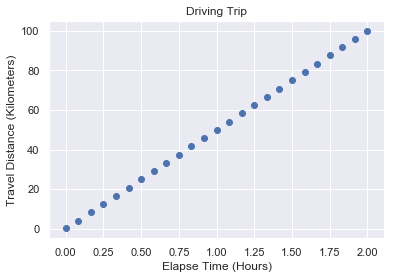

In [491]:
y_data=np.array([0.13536211,4.11568697,8.28931902,12.41058595,16.73878397,20.64153844,25.14540098,29.10323276,33.35991992,37.47921914,41.78850899,45.66165494,49.9731319,54.13466214,58.42781412,62.40834239,66.65229765,70.76017847,75.00351781,79.2152346,83.24161507,87.59539364,91.74179923,95.87520786,100.07507133])
x_data=np.array([0.,0.08333333,0.16666667,0.25,0.33333333,0.41666667,0.5,0.58333333,0.66666667,0.75,0.83333333,0.91666667,1.,1.08333333,1.16666667,1.25,1.33333333,1.41666667,1.5,1.58333333,1.66666667,1.75,1.83333333,1.91666667,2.])

plt.scatter(x_data,y_data)
plt.title('Driving Trip')
plt.xlabel('Elapse Time (Hours)')
plt.ylabel('Travel Distance (Kilometers)')
plt.show()

In [492]:
# Store x_data and y_data, as times and distances, in df, and use ols() to fit a model to it.
df = pd.DataFrame(dict(times=x_data, distances=y_data))
model_fit = ols(formula="distances ~ times", data=df).fit()

# Extact the model parameters and their uncertainties
a0 = model_fit.params['Intercept']
e0 = model_fit.bse['Intercept']
a1 = model_fit.params['times']
e1 = model_fit.bse['times']

# Print the results with more meaningful names
print('Estimate    of the intercept = {:0.2f}'.format(a0))
print('Uncertainty of the intercept = {:0.2f}'.format(e0))
print('Estimate    of the slope = {:0.2f}'.format(a1))
print('Uncertainty of the slope = {:0.2f}'.format(e1))

Estimate    of the intercept = -0.02
Uncertainty of the intercept = 0.04
Estimate    of the slope = 50.02
Uncertainty of the slope = 0.03


The size of the parameters standard error only makes sense in comparison to the parameter value itself. In fact the units are the same! So a1 and e1 both have units of velocity (meters/second), and a0 and e0 both have units of distance (meters).

### 3.4.2 Variation in Two Parts
Given two data sets of distance-versus-time data, one with very small velocity and one with large velocity. Notice that both may have the same standard error of slope, but different R-squared for the model overall, depending on the size of the slope ("effect size") as compared to the standard error ("uncertainty").

If we plot both data sets as scatter plots on the same axes, the contrast is clear. Variation due to the slope is different than variantion due to the random scatter about the trend line. In this exercise, your goal is to compute the standard error and R-squared for two data sets and compare.

In [495]:
df = pd.read_csv('_datasets/driving_trip.csv')
df.head()

,distances1,distances2,times
0,16.243454,16.243454,0.000000
1,-1.950897,-5.284231,0.083333
2,3.051616,-3.615051,0.166667
3,1.770314,-8.229686,0.250000
4,25.320743,11.987410,0.333333


Text(0, 0.5, 'Travel Distance (Kilometers)')

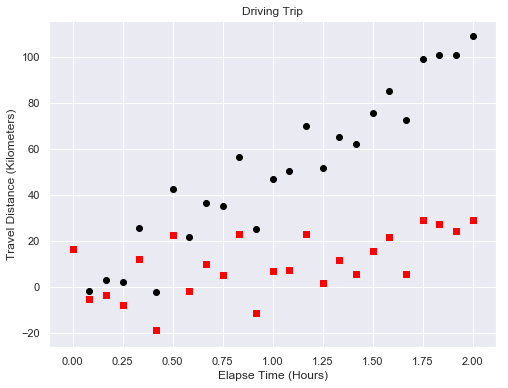

In [502]:
plt.figure(figsize=(8,6))
plt.scatter(df.times, df.distances1, c='black', marker='o') # https://matplotlib.org/3.1.0/api/markers_api.html
plt.scatter(df.times, df.distances2, c='red', marker='s')
plt.title('Driving Trip')
plt.xlabel('Elapse Time (Hours)')
plt.ylabel('Travel Distance (Kilometers)')

In [503]:
# Build and fit two models, for columns distances1 and distances2 in df
model_1 = ols(formula="distances1 ~ times", data=df).fit()
model_2 = ols(formula="distances2 ~ times", data=df).fit()

# Extract R-squared for each model, and the standard error for each slope
se_1 = model_1.bse['times']
se_2 = model_2.bse['times']
rsquared_1 = model_1.rsquared
rsquared_2 = model_2.rsquared

# Print the results
print('Model 1: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_1, rsquared_1))
print('Model 2: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_2, rsquared_2))

Model 1: SE = 3.694, R-squared = 0.898
Model 2: SE = 3.694, R-squared = 0.335


Notice that the standard error is the same for both models, but the r-squared changes. **The uncertainty in the estimates of the model parameters is indepedent from R-squred** because that uncertainty is being driven not by the linear trend, but by the inherent randomness in the data. This serves as a transition into looking at statistical inference in linear models.

# 4. Estimating Model Parameters
In our final chapter, we introduce concepts from inferential statistics, and use them to explore how maximum likelihood estimation and bootstrap resampling can be used to estimate linear model parameters. We then apply these methods to make probabilistic statements about our confidence in the model parameters.

## 4.1 Inferential Statistics Concepts

In [504]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/12-Inferential_Statistics_Concepts.mp4" type="video/mp4">
</video>

### 4.1.1 Sample Statistics versus Population
In this exercise you will work with a preloaded `population`. You will construct a `sample` by drawing points at random from the population. You will compute the mean standard deviation of the sample taken from that population to test whether the sample is representative of the population. Your goal is to see where the sample statistics are the same or very close to the population statistics.

In [505]:
population=np.array([104.96714153,98.61735699,106.47688538,115.23029856,97.65846625,97.65863043,115.79212816,107.67434729,95.30525614,105.42560044,95.36582307,95.34270246,102.41962272,80.86719755,82.75082167,94.37712471,89.8716888,103.14247333,90.91975924,85.87696299,114.65648769,97.742237,100.67528205,85.75251814,94.55617275,101.1092259,88.49006423,103.75698018,93.9936131,97.0830625,93.98293388,118.52278185,99.86502775,89.42289071,108.22544912,87.7915635,102.08863595,80.40329876,86.71813951,101.96861236,107.3846658,101.71368281,98.84351718,96.98896304,85.2147801,92.80155792,95.39361229,110.57122226,103.4361829,82.36959845,103.24083969,96.1491772,93.23078,106.11676289,110.30999522,109.31280119,91.60782477,96.90787624,103.31263431,109.75545127,95.20825762,98.14341023,88.93665026,88.03793376,108.12525822,113.56240029,99.27989878,110.03532898,103.61636025,93.54880245,103.61395606,115.38036566,99.64173961,115.64643656,73.80254896,108.21902504,100.87047068,97.0099265,100.91760777,80.12431085,97.80328112,103.57112572,114.77894045,94.81729782,91.91506397,94.98242956,109.15402118,103.2875111,94.70239796,105.13267433,100.97077549,109.68644991,92.97946906,96.72337853,96.07891847,85.36485052,102.96120277,102.61055272,100.05113457,97.65412867,85.84629258,95.79354677,96.57285483,91.97722731,98.38714288,104.04050857,118.86185901,101.74577813,102.57550391,99.25554084,80.81228785,99.73486125,100.6023021,124.63242112,98.07639035,103.01547342,99.6528823,88.31321962,111.42822815,107.51933033,107.91031947,90.90612545,114.02794311,85.98148937,105.86857094,121.90455626,90.09463675,94.3370227,100.99651365,94.96524346,84.49336569,100.68562975,89.37696286,104.73592431,90.80575766,115.49934405,92.16746708,96.77938484,108.13517217,87.69135684,102.27459935,113.07142754,83.92516765,101.84633859,102.59882794,107.81822872,87.63049289,86.79543387,105.21941566,102.96984673,102.5049285,103.46448209,93.19975278,102.32253697,102.93072473,92.85648582,118.65774511,104.73832921,88.08696503,106.56553609,90.2531833,107.87084604,111.58595579,91.79317682,109.63376129,104.12780927,108.2206016,118.96792983,97.54611884,92.46263836,91.1048557,91.84189715,99.22898291,103.41151975,102.76690799,108.27183249,100.13001892,114.53534077,97.35343167,127.20169167,106.25667348,91.42842444,89.29107502,104.82472415,97.76537215,107.14000494,104.73237625,99.27171087,91.53206282,84.85152775,95.53485048,108.56398794,102.14093744,87.54261221,101.73180926,103.8531738,91.16142564,101.53725106,100.58208718,88.57029702,103.5778736,105.60784526,110.83051243,110.53802052,86.22330632,90.6217496,105.15035267,105.13785951,105.15047686,138.52731491,105.70890511,111.3556564,109.54001763,106.51391251,96.84730755,107.5896922,92.27174785,97.63181393,95.14636452,100.81874139,123.14658567,81.32734807,106.8626019,83.87284129,95.28068134,110.88950597,100.64280019,89.22255222,92.84696291,106.79597749,92.69633368,102.1645859,100.4557184,93.48399652,121.43944089,106.33919022,79.74857413,101.86454315,93.38213535,108.52433335,92.07479262,98.85263559,105.04987279,108.65755194,87.99703593,96.65498764,95.25054689,93.46670767,117.6545424,104.04981711,87.39116046,109.17861947,121.22156197,110.32465261,84.80630034,95.15765927,112.66911149,92.92330534,104.43819428,107.74634053,90.73069528,99.40474644,67.5873266,89.75612359,97.47431849,87.52216818,116.32411304,85.69858622,95.59955513,101.30740577,114.41273289,85.64137849,111.63163752,100.10233061,90.18491349,104.62103474,101.99059696,93.99783123,100.69802085,96.14686403,101.13517345,106.62130675,115.86016816,87.62184501,121.33033375,80.479122,98.48214905,105.88317206,102.80991868,93.7730048,97.9187775,95.06999065,94.10635243,108.49602097,103.57015486,93.07090405,108.99599875,103.07299521,108.12862119,106.29628842,91.71004989,94.3981896,107.47293605,106.10370265,99.79098406,101.17327383,112.77664896,94.08428611,105.47097381,97.97807348])

In [506]:
# Compute the population statistics
print("Population mean {:.1f}, stdev {:.2f}".format( population.mean(), population.std() ))

# Set random seed for reproducibility
np.random.seed(42)

# Construct a sample by randomly sampling 31 points from the population
sample = np.random.choice(population, size=31)

# Compare sample statistics to the population statistics
print("    Sample mean {:.1f}, stdev {:.2f}".format( sample.mean(), sample.std() ))

Population mean 100.0, stdev 9.74
    Sample mean 102.1, stdev 9.34


Notice that the sample statistics are similar to the population statistics, but not the identical. If you were to compute the `len()` of each array, it is very different, but the means are not that much different as you might expect.

### 4.1.2 Variation in Sample Statistics
If we create one sample of `size=1000` by drawing that many points from a population. Then compute a sample statistic, such as the mean, a single value that summarizes the sample itself.

If you repeat that sampling process `num_samples=100` times, you get `100` samples. Computing the sample statistic, like the mean, for each of the different samples, will result in a distribution of values of the mean. The goal then is to compute the mean of the means and standard deviation of the means.

Here you will use the preloaded `population`, `num_samples`, and `num_pts`, and note that the `means` and `deviations` arrays have been initialized to zero to give you containers to use for the for loop.

In [514]:
num_pts = 1000
num_samples = 100
population = pd.read_csv('_datasets/pop.csv').population.values

array([104.96714153,  98.61735699, 106.47688538, 115.23029856,
        97.65846625])

In [515]:
# Initialize two arrays of zeros to be used as containers
means = np.zeros(num_samples)
stdevs = np.zeros(num_samples)

# For each iteration, compute and store the sample mean and sample stdev
for ns in range(num_samples):
    sample = np.random.choice(population, num_pts)
    means[ns] = sample.mean()
    stdevs[ns] = sample.std()

# Compute and print the mean() and std() for the sample statistic distributions
print("Means:  center={:>6.2f}, spread={:>6.2f}".format(means.mean(), means.std()))
print("Stdevs: center={:>6.2f}, spread={:>6.2f}".format(stdevs.mean(), stdevs.std()))

Means:  center=100.00, spread=  0.35
Stdevs: center= 10.01, spread=  0.22


If we only took one sample, instead of 100, there could be only a single mean and the standard deviation of that single value is zero. But each sample is different because of the randomness of the draws. **The mean of the means is our estimate for the population mean**, **the stdev of the means is our measure of the uncertainty in our estimate of the population mean**. This is the same concept as the standard error of the slope seen in linear regression.

### 4.1.3 Visualizing Variation of a Statistic
Previously, you have computed the variation of sample statistics. Now you'll visualize that variation.

We'll start with a preloaded `population` and a predefined function `get_sample_statistics()` to draw the samples, and return the sample statistics arrays.

Here we will use a predefined `plot_hist()` function that wraps the matplotlib method `axis.hist()`, which both bins and plots the array passed in. In this way you can see how the sample statistics have a distribution of values, not just a single value.

In [527]:
def get_sample_statistics(population,num_samples=100, num_pts=1000):
    # Initialize two arrays of zeros to be used as containers
    means = np.zeros(num_samples)
    stdevs = np.zeros(num_samples)

    # For each iteration, compute and store the sample mean and sample stdev
    for ns in range(num_samples):
        sample = np.random.choice(population, num_pts)
        means[ns] = sample.mean()
        stdevs[ns] = sample.std()
    
    return means,stdevs

def plot_hist(data, bins, data_name, color, figsize = (8,6)):
    fig, axis = plt.subplots(figsize = figsize)
    
    axis.hist(data, bins=bins, color=color)
    plt.title('Distribution of the '+data_name+': center={:>6.2f}, spread={:>6.2f}'.format(data.mean(), data.std()))
    plt.xlabel('Value of '+data_name)
    plt.ylabel('Bin counts of '+ data_name)
    return fig    

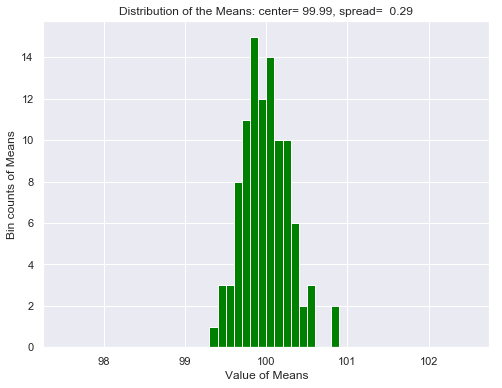

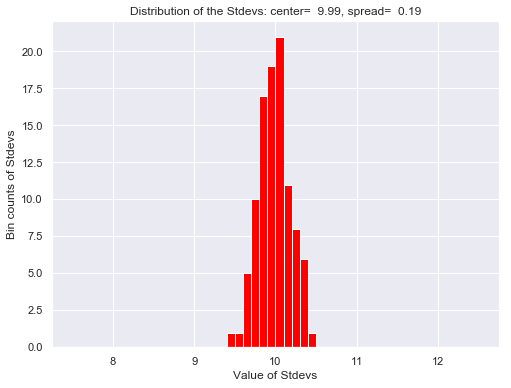

In [528]:
# Generate sample distribution and associated statistics
means, stdevs = get_sample_statistics(population, num_samples=100, num_pts=1000)

# Define the binning for the histograms
mean_bins = np.linspace(97.5, 102.5, 51)
std_bins = np.linspace(7.5, 12.5, 51)

# Plot the distribution of means, and the distribution of stdevs
fig = plot_hist(data=means, bins=mean_bins, data_name="Means", color='green')
fig = plot_hist(data=stdevs, bins=std_bins, data_name="Stdevs", color='red')

## 4.2 Model Estimation and Likelihood


In [530]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/13-Model_Estimation_and_Likelihood.mp4" type="video/mp4">
</video>

### Likelihood vs Probability
- Conditional Probability: P (outcome A∣given B)
- Probability: P (data∣model)
- Likelihood: L(model∣data)

### Maximum Likelihood Estimation
```Python
    # Create an array of mu guesses
    low_guess = sample_mean - 2*sample_stdev
    high_guess = sample_mean + 2*sample_stdev
    mu_guesses = np.linspace(low_guess, high_guess, 101)

    # Compute the loglikelihood for each guess
    loglikelihoods = np.zeros(len(mu_guesses))
    for n, mu_guess in enumerate(mu_guesses):
    loglikelihoods[n] = compute_loglikelihood(sample_distances, mu=mu_guess, sig
    
    # Find the best guess
    max_loglikelihood = np.max(loglikelihoods)
    best_mu = mu_guesses[loglikelihoods == max_loglikelihood]
```

![][19_MaximumLikelihoodEstimation]

[19_MaximumLikelihoodEstimation]:_Docs/19_MaximumLikelihoodEstimation.png

### 4.2.1 Estimation of Population Parameters
Imagine a constellation ("population") of satellites orbiting for a full year, and the distance traveled in each hour is measured in kilometers. There is variation in the distances measured from hour-to-hour, due to unknown complications of orbital dynamics. Assume we cannot measure all the data for the year, but we wish to build a population model for the variations in orbital distance per hour (speed) based on a sample of measurements.

In this exercise, you will assume that the population of hourly distances are best modeled by a gaussian, and further assume that the parameters of that population model can be estimated from the sample statistics. Start with the preloaded `sample_distances` that was taken from a population of cars.

![][20_estimation]

[20_estimation]:_Docs/20_estimation.png

In [590]:
#Define gaussian model function
def gaussian_model(x, mu, sigma):
    coeff_part = 1/(np.sqrt(2 * np.pi * sigma**2))
    exp_part = np.exp( - (x - mu)**2 / (2 * sigma**2) )
    return coeff_part*exp_part

def plot_hist(data, figsize = (8,6)):
    fig, axis = plt.subplots(figsize = figsize)
   
    axis.hist(data, density = True, bins=20, label='data', alpha=0.5, color='gray')
    plt.title('Data and Model')
    plt.xlabel('Distance')
    plt.ylabel('Population Vs Sample')
    return fig

def plot_data_and_model(x, model):    
    fig = plot_hist(x)  # plot measured data
    fig.axes[0].scatter(x, model, color='red', label='Model')  # over-plot modeled data
    plt.legend()
    plt.show()
    return fig

In [531]:
sample_distances=np.array([27143.88628178,27087.98325817,27580.04229165,27113.1083337,27057.40721048,26693.19226411,26916.87962035,27229.72020211,26755.77703262,26994.32512326,26863.90989702,26885.76359407,27055.16802439,26846.50278894,26761.62724163,27011.92714,27006.0414866,27112.55543553,27075.29318558,27241.03510749,26886.05773059,26853.25717425,27356.50242839,27083.71944651,27048.1317373,26833.17214224,27187.1114273,26792.09492182,27327.65334315,26905.32791217,26965.08045969,26781.97735558,27001.76307178,26457.73102378,27104.47241451,27039.42276518,26984.93044729,27015.64782321,26734.91971513,26917.33608426,27018.00056773,26687.14839143,27339.65512105,26999.48176249,27232.23332988,27055.67780598,26558.44932455,26853.1677454,26801.88222348,26861.18523779,26801.07982206,27313.85177827,27028.90702211,27134.47888438,27184.32863559,26655.06969382,26766.95785922,27246.58734932,26859.90997974,26843.13093501,27453.13275985,26873.41574937,26878.4825768,26822.42307365,26994.9099121,26946.60404244,26877.97718899,26823.59522223,26901.05746475,27042.79485155,26678.05762212,26815.86185253,26705.87521488,27025.03575828,26601.45264973,27063.85095746,26873.54531063,26962.82916206,27075.37369548,27084.79512368,26864.61856166,27223.18632238,26557.40113102,26995.79204744,26917.01806731,26749.54338877,26600.2621505,26919.74101142,27092.700555,26977.8727147,26849.13471473,26524.28234783,26903.92055912,26957.90186854,27053.1976854,27113.30038626,26833.69061488,26980.32286769,27457.87472776,26607.4298234,27120.50297762,26813.97549293,27119.1785466,26990.11041907,26753.55181914,26525.20469951,26842.72974227,26973.67981323,26644.18669416,27335.23537165,26974.77143351,27114.95839037,26858.96264682,26835.49786595,26531.37432824,27126.72630558,26913.79981063,26860.88065597,27238.26729004,26903.87271231,27513.09247822,26548.8345489,26999.26166747,27057.7189009,26855.09506965,26846.60168945,26998.49380647,26681.04629384,27053.79099607,26496.07750486,27036.1456002,27016.92252596,26481.37833241,27463.50952723,26941.62131814,26709.51469047,26566.83038974,27183.90514637,26857.18592379,26890.57821981,27297.38075903,27182.21187189,27007.75242303,26745.98219617,26604.88487869,27265.42925406,26966.86884722,26737.8827,26861.68486165,27100.295441,27187.91639576,27244.33375738,26785.46575254,26596.83571684,26634.24093179,26977.26170876,26837.52656605,27161.00628236,26824.60504805,26818.95578474,26933.79406034,26746.69702688,26992.12439671,26594.40884625,27136.65457708,27006.47774178,27348.6312121,26640.05169387,26714.48926311,26976.750765,26891.78137871,27415.10567461,26863.34205649,26864.13041363,26933.87284308,27240.9018238,26780.34584953,27101.21398455,26536.27695868,27205.70198053,26766.53883905,26828.57836298,26995.50842643,26714.33520856,26850.33271654,27351.41721953,26804.22626971,26654.90293713,27304.44206032,26847.36626491,26804.55720083,26829.07844477,26764.00163473,27052.12291217,26567.20279511,26960.61254516,27065.57672416,26744.10077992,27314.71742361,26663.42154431,26970.9819719,26694.67840398,26996.04004449,26801.79974578,27061.01623074,26937.19018333,26857.45686715,26593.49519935,26716.65215727,27010.58406499,27054.09857263,26944.52372485,26878.21290192,26989.57495373,27096.37064746,26716.88817842,26836.57256623,27033.67598741,26863.87803964,27047.20798789,27034.91369359,26685.87451072,27039.83885243,26791.89970318,26849.33668429,27026.34834406,26695.23683922,26904.80471305,26436.85015118,26830.81472121,26911.67043354,27404.79981318,26957.87969301,27033.96423562,26957.63539671,26771.38920367,27258.24706918,26968.81217189,27199.03755538,26961.52942659,26739.94237613,27134.65276966,26630.07179143,26754.10986303,26734.2688266,26955.89986361,26980.93876681,26780.9502099,26881.43697313,26861.55370871,26938.04451192,27424.71030759,27224.90782133,27567.66884372,26942.45666815,26666.49862448,26811.51215308,26862.3358439,26990.77460817,26724.01040161,26716.03660602,27089.57059653,27089.43869505,26738.7977659,26639.01975494,26732.8054403,27148.6025703,26772.1406178,26823.98368548,26944.55993598,26899.06286655,27274.75301706,26732.66097594,27078.97928512,27156.28365114,26674.92376282,26591.16650517,26901.28578514,26854.2124564,26637.76152564,27067.74816302,26977.5439568,26938.91884692,27056.15166122,26905.21037053,26887.87603461,26618.12393823,26842.1454847,27243.69949251,27019.77978195,27024.08660277,26942.38510255,26855.35443262,26486.76635941,26514.29446274,26886.15161863,26585.50047227,26654.4768983,26991.29015812,27157.85397661,26933.96043703,26890.65691518,27238.72323288,26805.130186,27125.58144028,27327.70213603,27171.75239724,27093.72863873,26587.66972079,26617.52797802,26821.20198502,26857.73533964,26635.38737764,26661.90040372,26829.5779198,26741.62947342,27190.30556829,26579.22864091,27497.96834736,27081.02355063,26769.52914657,26985.74574184,27595.80878556,26487.11507164,27292.42142024,26733.38001826,26648.9204039,27429.34320411,26843.95841763,26892.15101573,26822.53694383,26475.39327269,26981.99259762,26764.28248029,27077.40025535,26873.83834394,27194.15938715,26953.27264372,26964.84608336,27080.18180957,26683.31744167,26502.83895785,26844.16395718,27134.59783351,26990.62775284,26922.07725332,27190.05269203,27065.33499104,27268.61508165,26512.11430426,26612.70415815,26942.6117626,26785.98958143,26879.59951891,27074.25111081,26638.0334235,26858.27340454,27265.22585654,26731.03040891,26706.0906174,26881.98394737,27076.9711286,27072.06023771,27172.94087273,26860.60951111,26637.69630775,26921.5832547,26868.06131472,26600.09476209,26660.55416077,26615.43446626,26834.83778753,27068.60120026,26916.29208527,26988.51212715,26825.589366,27010.21997456,26767.49717399,26582.69461741,26654.01298353,26878.09411344,26842.16941808,26769.71400851,26793.55753181,26780.7725181,26832.16520869,26520.33080082,26878.99396777,26626.28412691,26836.54178272,26747.54469582,27325.33127661,27000.43140943,26591.54085344,27050.44515082,26819.78852642,26768.79271964,26623.20005054,26499.24012889,27034.55732796,26972.30548523,27076.97833476,27145.97653883,27370.45045816,26788.54262976,27185.12908371,27105.10953604,26633.87050673,26497.62446903,26629.59429991,27303.09765554,27512.90634296,26979.4130203,27288.31979692,26775.90921763,27246.3093449,26702.97967346,27127.80327595,26887.79015222,26845.61680541,27325.07216057,26912.04092278,26698.64746013,27069.89578735,26896.89216195,26825.16825668,26719.23253875,27089.1351968,26907.17017392,26615.46233873,26647.44351774,26882.2284668,26873.25430701,27131.32632721,26561.99089323,26896.45048256,26779.47437051,26866.97946212,26580.68558289,26866.31573419,26942.87693368,26575.09935991,26895.31801405,26927.33675451,27097.5658296,27128.16478439,26405.45893621,26994.71552069,27063.31273634,26748.21332282,26808.8932871,26724.7750947,26886.51488927,26505.51673261,26998.04607751,26816.22792519,26849.55072425,26826.30312419,27380.98648648,27001.70154691,26945.59491929,26892.01594966,27008.94931909,27216.56367404,26780.61753675,27085.16847858,27309.98648719,27024.33210759,26696.51722235,26885.77145915,27091.30918844,27288.44923661,26843.78490903,26995.37811275,27138.50850968,27075.52853479,26788.01558595,26686.5137108,26907.76987956,27043.41094828,27002.33688256,27000.58628711,26923.24546555,26992.01623444,26839.18921918,26876.01983098,26824.33127226,26670.56916053,27171.51413067,26223.68323013,27181.98404,26803.87711263,27103.321864,27095.93537004,26770.49982931,27057.20228503,27221.60761577,27094.98258615,27115.18560631,26842.77894778,27323.4894849,26881.86334618,26837.51410218,27130.37924233,26660.94358069,26731.11198984,26905.96625456,26789.17451613,26934.47552903,26695.9977087,26951.91390559,26930.80109208,26650.40867341,27314.64800395,26801.46760827,27087.49867632,26630.66491592,26918.4092305,26953.25107897,26717.30404149,26949.66946678,26754.97063429,26870.10207066,26807.38876625,27107.55234701,26601.59319672,26821.24022814,26685.63552257,27044.86820473,27416.09728796,26677.99084544,26854.67530358,26786.93680732,27010.23095439,27232.56444479,26887.24710797,26680.41523995,26834.47744991,27062.41793769,26763.82670317,26935.17919968,27100.28799049,26698.32757744,27198.96478924,26650.21345545,26887.53157538,26814.57686748,26605.44529358,27215.91089759,26685.02505006,26807.00356023,27183.35159978,27299.01025863,26540.3273963,27014.04664468,27182.21812316,26767.58852115,27009.07760766,26723.04531565,27017.79895826,26768.65088691,26777.76464446,26315.61040777,27133.86367531,26918.66726152,26853.81704745,27347.05391,26766.18432387,26960.80182685,26988.449127,26876.66140718,26939.05893723,26982.01789116,26919.20819375,26747.81346849,26717.85402756,26739.96859867,27046.28760018,26679.84821861,26675.41876112,26896.86351377,26834.36394749,27025.01206036,26832.62404834,26796.37376438,26722.27745533,26604.57505423,26874.84134077,26709.89006538,26647.86223725,27365.60478048,27250.48206328,26943.0014568,26681.2406666,26908.14576762,26768.46801898,26704.72233385,27395.07225842,26555.49997708,26920.70572279,26787.9513203,26621.50935879,27023.69869608,26983.26169904,27051.78206884,26924.32570734,27221.81159283,27041.46242069,26893.2471373,26620.10418654,26803.4755538,27110.75619235,26971.28591253,27004.02059281,26482.00284554,26667.06080455,26796.77272328,27053.93552085,26917.11701927,26742.88375437,26597.94705253,26947.42274881,26702.75921747,26960.44887525,27066.83062975,26638.57233818,26636.88207672,27326.19853941,26900.83561322,26931.97729053,26599.46245532,27348.70514627,26950.12066067,26695.35062517,26729.06808538,26998.34292279,27019.78429031,26763.23333842,27147.21522235,26754.26076967,26655.98520353,27086.3651111,26652.40607143,27091.7757577,27062.96184973,27105.95015082,26792.60176359,27127.00319873,27050.079599,26845.32238507,27226.1787699,26931.21354275,26680.03663918,26945.87861519,27201.82207787,26941.14577377,26893.08110167,26805.7467604,27194.65948651,26793.96677552,27206.19599613,27224.62796493,26875.27332831,27283.97611498,26983.48649331,27219.68903172,27052.57102147,26933.15409584,27139.31217806,26976.22048026,26774.99891765,26942.74073873,27038.3178845,27087.09341814,26995.69255902,26946.14042527,26903.47898471,26733.12804219,27300.39468856,27033.12914345,27234.96606573,27323.80585794,27321.96344636,26843.46999031,26674.17193316,26972.83513715,27146.64170615,26489.85474017,27210.57478495,27165.28016939,27195.45813929,26727.86490468,27104.78719821,27051.34953546,26836.93814066,26592.54776213,26703.80227206,26855.44832291,26593.15487319,26671.55142006,27236.79514512,27169.13090286,27250.99331408,26833.65624651,26943.85545535,26832.80716137,26777.88560215,26914.76627881,27097.62559952,26963.72096872,26797.53748958,26941.24868294,26658.10570875,26719.42705881,27128.30406468,27038.41144606,26989.98023337,26780.44553277,26643.26778624,27122.50113836,26820.2468365,26743.371561,26625.22120759,26910.22885212,26676.67434759,26931.08841229,27028.30751521,26715.73606702,27097.83048853,26752.17630407,26671.09756155,26755.26600278,26370.7931108,26928.53647969,27075.80042784,26578.35985294,27002.0644265,27019.44718263,26924.43204291,27396.64607862,27166.88130204,26738.05290813,26911.29195765,26870.85296559,26996.29539281,27051.67225526,26675.14343869,26936.77477091,26994.14449431,26636.99318269,26754.42383871,26852.07254784,27023.25751189,27078.57722094,26665.21185785,27378.73907689,26990.43019433,27042.00311502,26535.25252992,27217.66345914,26864.36032814,26728.99675236,26810.25495155,27081.33425362,26610.70127851,26750.27968439,26660.33556415,26502.09070115,26759.74644598,26331.88707073,26953.62290489,27225.54555162,26803.85604939,27015.80260236,27063.97236074,27385.62714809,27314.66456811,26605.24572727,27196.06336614,26540.36402604,26714.60999015,27070.9127378,26624.93717501,26768.40846424,26654.76203627,26499.09780301,26631.22707081,26920.58225453,26877.40880054,27082.2237341,26827.86981599,27183.80817945,27254.65759647,26986.3498665,26891.20102975,26772.17730581,27022.56291652,27222.27181425,27032.95585834,26425.61520155,26990.75731642,27025.2380441,27350.73641571,26586.64903611,26649.97317418,27111.79872903,26925.84914513,26846.22885122,27101.85249399,26902.73954691,26984.05823343,27023.62942578,27034.21271529,27017.04554648,26768.6557724,26518.5160293,26836.093973,27304.38452298,27475.42373782,26828.68336861,26861.25909624,26845.25731839,26656.6082006,27407.50248621,27059.52042785,26616.03753249,26557.44125806,26943.8869675,26898.74692024,26994.91799687,27083.65141568,27085.82309686,26841.77912625,27103.62403982,27343.12373789,26845.49505206,26532.02269793,27032.98876105,27053.56903534,27411.25022777,27029.58842804,26929.58851687,26818.69960195,27306.97990886,26495.64048647,26792.38926062,26833.75249299,26909.81195161,27208.8970663,26952.93021651,27031.57025867,26887.10128666,26771.66893823,26523.07005484,27362.29681554,26927.53837938,26917.88028539,26900.10269084,27240.5227911,27081.44638233,26677.93446405,26917.97260646,26836.60271979,26461.22083287,27281.22945966,27273.74150261,26976.44476805,26875.84043766,27106.3293943,26799.52335095,27007.24644262,26665.16966301,27304.18394391,27274.59688309,26698.09233131,26791.34443134,26933.52542265,27092.15719432,27459.08034851,26978.15558848,26720.64676711,27305.78954085,26858.61814665,26297.59172422,26943.93494132,26793.18115764,26675.93582648,27329.56087595,26623.85064432,26954.93895181,27006.99634429,26972.19643487,26548.91205334,26700.5882683,27218.44546661,26653.55229226,26677.28514474,26748.3959728,26915.79737455,27158.97192811,27290.58173574,27086.98581331,27006.43260782,27106.01510998,26701.22838215,26578.52101416,26722.69176413,27027.26101764,26762.08980586,27096.09446463,26943.22569795,26505.59147123,26863.34213189,26494.20132514,26753.72611516,26778.60980042,27008.33743502,26985.91717751,26615.82439677,26866.19639427,27206.61338108,26607.41840873,26832.85939927,26838.13637565,26850.27608958,26713.03256229,27093.70907553,26728.60490451,26721.61336247,26856.95405826,26780.65391093,27152.90060359,27065.71310498,26868.56348521,26870.46747994,27160.40631194,26603.45129763,27164.29835919,27050.25504941,27038.57219125,27114.21399491,27015.82602835,26782.83405673,27119.42172252,27207.79904991,27087.54947541,26697.06522995,27025.00358675,27463.94277955,27439.92924195,26758.2418425,27170.83196079,27004.1265311,26973.39457052,26824.44913799,26887.24803323,26540.11143709,26977.01335687,27026.48820243,26876.57197134,26961.04725683,26774.41004752,27028.82952681,26884.38731073,26917.86490144,27221.46739035,26567.3547064,27437.83066131,27007.37053409,26934.79679098,26828.67647402,26918.02157083,27102.91594912,26926.21346822,26703.24071232,26752.40561732,26910.72499058,27073.01916917,26714.79735407,27113.196917,26925.71162521,27427.67784218,27051.8207997,26884.4680432,26856.70934044,27114.99783882,26937.11394529,26952.30554279,26733.23494685,27091.61448119,27192.92226796,27068.805274,26347.87498413,27106.86164021,26970.13665055,26279.50028187,26497.08684322,27254.38245243,26942.48399784,26898.40060351])

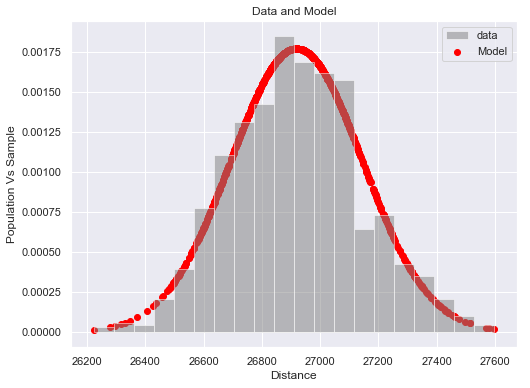

In [574]:
# Compute the mean and standard deviation of the sample_distances
sample_mean = np.mean(sample_distances)
sample_stdev = np.std(sample_distances)

# Use the sample mean and stdev as estimates of the population model parameters mu and sigma
population_model = gaussian_model(sample_distances, mu=sample_mean, sigma=sample_stdev)

# Plot the model and data to see how they compare
fig = plot_data_and_model(sample_distances, population_model)

Notice in the plot that the data and the model do not line up exactly. This is to be expected because **the sample is just a subset of the population**, and **any model built from it cannot be a prefect representation of the population**. Also notice the vertical axis: it shows the normalize data bin counts, and the probability density of the model. Think of that as probability-per-bin, so that if summed all the bins, the total would be 1.0.

### 4.2.2 Maximizing Likelihood, Part 1
Previously, we chose the sample `mean` as an estimate of the population model paramter `mu`. **But how do we know that the sample mean is the best estimator?** This is tricky, so let's do it in two parts.

In Part 1, you will use a computational approach to compute the log-likelihood of a given estimate. Then, in Part 2, we will see that when you compute the log-likelihood for many possible guess values of the estimate, one guess will result in the maximum likelihood.

In [576]:
# Compute sample mean and stdev, for use as model parameter value guesses
mu_guess = np.mean(sample_distances)
sigma_guess = np.std(sample_distances)

# For each sample distance, compute the probability modeled by the parameter guesses
probs = np.zeros(len(sample_distances))
for n, distance in enumerate(sample_distances):
    probs[n] = gaussian_model(distance, mu=mu_guess, sigma=sigma_guess)

# Compute and print the log-likelihood as the sum() of the log() of the probabilities
loglikelihood = np.sum(np.log(probs))
print('For guesses mu={:0.2f} and sigma={:0.2f}, the loglikelihood={:0.2f}'.format(mu_guess, sigma_guess, loglikelihood))

For guesses mu=26918.39 and sigma=224.99, the loglikelihood=-6834.98


Although the likelihood (the product of the probabilities) is easier to interpret, the loglikelihood has better numerical properties. Products of small and large numbers can cause numerical artifacts, but sum of the logs usually doesnt suffer those same artifacts, and the "sum(log(things))" is closely related to the "product(things)"

### 4.2.3 Maximizing Likelihood, Part 2
In Part 1, you computed a single log-likelihood for a single `mu`. In this Part 2, you will apply the predefined function `compute_loglikelihood()`, to compute an array of log-likelihood values, one for each element in an array of possible `mu` values.

The goal then is to determine which single `mu` guess leads to the single maximum value of the `loglikelihood` array.

To get started, use the preloaded data `sample_distances`, `sample_mean`, `sample_stdev` and a helper function `compute_loglikelihood()`

In [625]:
def compute_loglikelihood(X, mu_guess, sigma_guess):
    # For each sample point, compute a probability
    probabilities = np.zeros(len(X))
    for n, x in enumerate(X):        
        probabilities[n] = gaussian_model(x, mu=mu_guess, sigma=sigma_guess)
    
    likelihood = np.product(probabilities)
    loglikelihood = np.sum(np.log(probabilities))
    return loglikelihood

def plot_data

Maximum loglikelihood found for best mu guess=26918.392414057933


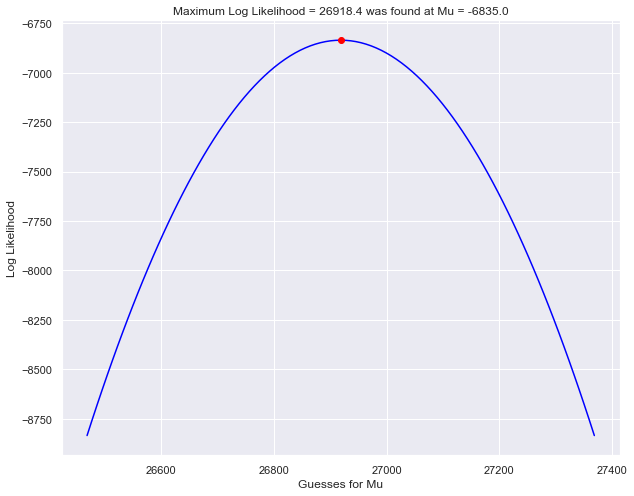

In [646]:
# Create an array of mu guesses, centered on sample_mean, spread out +/- by sample_stdev
low_guess = sample_mean - 2*sample_stdev
high_guess = sample_mean + 2*sample_stdev
mu_guesses = np.linspace(low_guess, high_guess, 101)
# Compute the loglikelihood for each model created from each guess value
loglikelihoods = np.zeros(len(mu_guesses))
for n, mu_guess in enumerate(mu_guesses):
    loglikelihoods[n] = compute_loglikelihood(sample_distances, mu_guess, sample_stdev)

# Find the best guess by using logical indexing, the print and plot the result
max_loglikelihoods = np.max(loglikelihoods)
best_mu = mu_guesses[loglikelihoods==max_loglikelihoods][0]
print('Maximum loglikelihood found for best mu guess={}'.format(best_mu))
                                                                
                                                                
title = 'Maximum Log Likelihood = {:.1f} was found at Mu = {:.1f}'.format(best_mu,max_loglikelihoods)
plt.figure(figsize=(10,8))
plt.plot(mu_guesses,loglikelihoods, color='blue', marker=None)
plt.plot(best_mu, max_loglikelihoods, color = 'red', marker='o')
plt.title(title)
plt.xlabel('Guesses for Mu')
plt.ylabel('Log Likelihood')
plt.show() 

Notice that the guess for `mu` that gave the maximum likelihood is precisely the same value as the `sample.mean()`. The `sample_mean` is thus said to be the "Maximum Likelihood Estimator" of the population mean `mu`. We call that value of `mu` the aximum Likelihood Estimator" of the population `mu` because, of all the `mu` values tested, it results in a model population th the greatest likelihood of producing the sample data we have.

## 4.3 Model Uncertainty and Sample Distributions

In [648]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/14-Model_Uncertainty_and_Sample_Distributions.mp4" type="video/mp4">
</video>

### Sample Statistic
![][21_sample]

### Bootstrap Resampling
![][22_Bootstrap]


``` Python
    # Use sample as model for population
    population_model = august_daily_highs_for_2017

    # Simulate repeated data acquisitions by resampling the "model"
    for nr in range(num_resamples):
        bootstrap_sample = np.random.choice(population_model, size=resample_size, re
        bootstrap_means[nr] = np.mean(bootstrap_sample)

    # Compute the mean of the bootstrap resample distribution
    estimate_temperature = np.mean(bootstrap_means)

    # Compute standard deviation of the bootstrap resample distribution
    estimate_uncertainty = np.std(bootstrap_means)
```

### Resample Distribution

![][23_Resample]

``` Python
    # Define the sample of notes
    sample = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    
    # Replace = True, repeats are allowed
    bootstrap_sample = np.random.choice(sample, size=4, replace=True)
    print(bootstrap_sample)
    C C F G
    
    # Replace = False
    bootstrap_sample = np.random.choice(sample, size=4, replace=False)
    print(bootstrap_sample)
    C G A F

    # Replace = True, more lengths are allowed
    bootstrap_sample = np.random.choice(sample, size=16, replace=True)
    print(bootstrap_sample)
    C C F G C G A E F D G B B A E C
```


[21_sample]:_Docs/21_sample.png
[22_Bootstrap]:_Docs/22_Bootstrap.png
[23_Resample]:_Docs/23_Resample.png

### 4.3.1 Bootstrap and Standard Error
Imagine a National Park where park rangers hike each day as part of maintaining the park trails. They don't always take the same path, but they do record their final distance and time. We'd like to build a statistical model of the variations in daily distance traveled from a limited sample of data from one ranger.

Your goal is to use bootstrap resampling, computing one mean for each resample, to create a distribution of means, and then compute standard error as a way to quantify the "uncertainty" in the sample statistic as an estimator for the population statistic.

Use the preloaded `sample_data` array of 500 independent measurements of distance traveled. For now, we this is a simulated data set to simplify this lesson. Later, we'll see more realistic data.

In [657]:
def plot_data_hist(bootstrap_means, figsize = (8,6)):
    
    distribution_mean = np.mean(bootstrap_means)
    standard_error = np.std(bootstrap_means)
    title = 'Resmaple count = {}, Mean = {:0.1f}, Std Error={:0.1f}'.format(len(bootstrap_means), distribution_mean, standard_error)
    
    fig, axis = plt.subplots(figsize = figsize)   
   
    axis.hist(bootstrap_means)
    plt.title(title)
    plt.xlabel('Resample Means')
    plt.ylabel('Resample Counts per Bin')
    return fig
    

In [652]:
sample_data=np.array([-2.56528602e-01,1.33537708e+00,3.10605971e+00,-3.88306749e-01,-3.68273914e-01,3.27842563e+00,1.67486946e+00,-7.78948772e-01,1.26512009e+00,-7.26835386e-01,-7.11459507e-01,7.23924543e-01,-3.56656049e+00,-3.16983567e+00,-8.24575058e-01,-1.70566224e+00,9.68494665e-01,-1.45604815e+00,-2.44460740e+00,3.33129754e+00,-3.15526010e-02,5.75056409e-01,-2.38949637e+00,-6.08765449e-01,7.21845179e-01,-1.78198715e+00,1.29139604e+00,-6.41277380e-01,-3.38749959e-03,-6.03413224e-01,4.32455637e+00,6.13005551e-01,-1.45542186e+00,2.32508982e+00,-1.74168730e+00,1.13772719e+00,-3.17934025e+00,-1.89637210e+00,1.17372247e+00,2.27693316e+00,1.16273656e+00,6.08703435e-01,2.57792609e-01,-2.07704398e+00,-5.39688417e-01,-1.27754192e-03,3.05424445e+00,1.64723658e+00,-2.54608031e+00,1.64816794e+00,2.49835439e-01,-3.13844001e-01,2.28335258e+00,3.14199904e+00,2.96256024e+00,-5.58435046e-01,5.21575248e-01,1.82252686e+00,3.13109025e+00,2.41651524e-01,8.48682047e-01,-9.72669948e-01,-1.13241325e+00,2.90505164e+00,4.01248006e+00,1.17597976e+00,3.34706580e+00,2.08327205e+00,8.97604908e-02,2.12279121e+00,4.49607313e+00,1.36834792e+00,4.58928731e+00,-3.75949021e+00,3.14380501e+00,1.69409414e+00,9.41985299e-01,1.74352155e+00,-2.39513783e+00,1.16065622e+00,2.33422514e+00,4.59578809e+00,6.23459563e-01,6.30127942e-02,6.96485913e-01,3.55080424e+00,2.39750222e+00,7.00479592e-01,2.80653487e+00,1.99415510e+00,3.75728998e+00,4.35893812e-01,1.20467571e+00,1.09578369e+00,-1.02702990e+00,2.51224055e+00,2.46211054e+00,1.97022691e+00,1.51082573e+00,-8.30741484e-01,1.17870935e+00,1.35457097e+00,4.55445462e-01,1.75742858e+00,2.90810171e+00,5.89237180e+00,2.48915563e+00,2.67510078e+00,2.03110817e+00,-1.63754243e+00,2.16697225e+00,2.36046042e+00,7.18648422e+00,1.89527807e+00,2.90309468e+00,2.25057646e+00,2.64392476e-03,4.64564563e+00,3.88386607e+00,3.98206389e+00,6.01225090e-01,5.24558862e+00,-3.43702126e-01,3.65371419e+00,6.88091125e+00,5.38927350e-01,1.40740454e+00,2.75930273e+00,1.57304869e+00,-5.01326862e-01,2.75712595e+00,5.15392573e-01,3.60718486e+00,8.41151532e-01,5.79986881e+00,1.15349342e+00,2.09587697e+00,4.38703443e+00,3.18271367e-01,3.25491987e+00,5.43428551e+00,-3.74966469e-01,3.22926772e+00,3.39976559e+00,4.46364574e+00,4.46098578e-01,2.99086774e-01,4.00388313e+00,3.57396935e+00,3.50098570e+00,3.71289642e+00,1.67995056e+00,3.52450739e+00,3.66614495e+00,1.67129716e+00,6.85154902e+00,4.08766584e+00,7.77393006e-01,4.49310722e+00,1.25063666e+00,4.79416921e+00,5.55719116e+00,1.61863536e+00,5.20675226e+00,4.12556185e+00,4.96412032e+00,7.13358597e+00,2.86922377e+00,1.87252767e+00,1.62097114e+00,1.78837943e+00,3.28579658e+00,4.14230395e+00,4.03338160e+00,5.15436650e+00,3.54600378e+00,6.44706815e+00,3.03068633e+00,9.02033833e+00,4.85133470e+00,1.90568489e+00,1.49821500e+00,4.62494483e+00,3.23307443e+00,5.12800099e+00,4.66647525e+00,3.59434217e+00,2.06641256e+00,7.50305551e-01,2.90697010e+00,5.53279759e+00,4.26818749e+00,1.36852244e+00,4.22636185e+00,4.67063476e+00,2.15228513e+00,4.24745021e+00,4.07641744e+00,1.69405940e+00,4.71557472e+00,5.14156905e+00,6.20610249e+00,6.16760410e+00,1.32466126e+00,2.22434992e+00,5.15007053e+00,5.16757190e+00,5.19009537e+00,1.18854630e+01,5.34178102e+00,6.49113128e+00,6.14800353e+00,5.56278250e+00,3.64946151e+00,5.81793844e+00,2.77434957e+00,3.86636279e+00,3.38927290e+00,4.54374828e+00,9.02931713e+00,6.85469615e-01,5.81252038e+00,1.23456826e+00,3.53613627e+00,6.67790119e+00,4.64856004e+00,2.38451044e+00,3.12939258e+00,5.93919550e+00,3.13926674e+00,5.05291718e+00,4.73114368e+00,3.35679930e+00,8.96788818e+00,5.96783804e+00,6.69714827e-01,5.11290863e+00,3.43642707e+00,6.48486667e+00,3.21495852e+00,4.59052712e+00,5.84997456e+00,6.59151039e+00,2.47940719e+00,4.23099753e+00,3.97010938e+00,3.63334153e+00,8.49090848e+00,5.78996342e+00,2.47823209e+00,6.85572389e+00,9.28431239e+00,7.12493052e+00,2.04126007e+00,4.13153185e+00,7.65382230e+00,3.72466107e+00,6.04763886e+00,6.72926811e+00,3.34613906e+00,5.10094929e+00,-1.24253468e+00,3.21122472e+00,4.77486370e+00,2.80443364e+00,8.58482261e+00,2.47971724e+00,4.47991103e+00,5.64148115e+00,8.28254658e+00,2.54827570e+00,7.76632750e+00,5.48046612e+00,3.51698270e+00,6.42420695e+00,5.91811939e+00,4.33956625e+00,5.69960417e+00,4.80937281e+00,5.82703469e+00,6.94426135e+00,8.81203363e+00,3.18436900e+00,9.94606675e+00,1.79582440e+00,5.41642981e+00,6.91663441e+00,6.32198374e+00,4.53460096e+00,5.38375550e+00,4.83399813e+00,4.66127049e+00,7.55920419e+00,6.59403097e+00,4.51418081e+00,7.71919975e+00,6.55459904e+00,7.58572424e+00,7.23925768e+00,4.34200998e+00,4.89963792e+00,7.53458721e+00,7.28074053e+00,6.03819681e+00,6.33465477e+00,8.67532979e+00,4.95685722e+00,7.25419476e+00,5.77561470e+00,5.76463759e+00,8.41755370e+00,7.89083270e+00,7.88701927e+00,8.89095761e+00,6.34200768e+00,7.68390594e+00,5.71946649e+00,7.00833270e+00,6.11971389e+00,6.59399193e+00,7.61031405e+00,4.80355863e+00,1.06447746e+01,4.46796524e+00,4.07162277e+00,8.83622175e+00,8.12332539e+00,7.80823963e+00,7.83669102e+00,6.57550645e+00,4.82549126e+00,6.79160912e+00,5.30567658e+00,8.63023947e+00,6.40588524e+00,5.06900561e+00,6.09722832e+00,7.58586291e+00,5.65255089e+00,5.15555921e+00,7.30737442e+00,7.32993314e+00,5.84611365e+00,5.93792339e+00,7.36409987e+00,4.02383132e+00,4.12507245e+00,5.52311156e+00,6.55310570e+00,7.62181513e+00,9.97071243e+00,8.75531925e+00,6.74012294e+00,7.04196758e+00,5.09494127e+00,7.08297373e+00,6.56268272e+00,7.80543712e+00,5.52553811e+00,8.23869303e+00,1.02854778e+01,7.02247970e+00,8.06342344e+00,8.66028798e+00,6.49755906e+00,7.76818496e+00,7.36518480e+00,7.55535220e+00,5.83398043e+00,7.44902035e+00,8.41599658e+00,1.03422872e+01,9.37854165e+00,1.17863649e+01,5.96530487e+00,9.26464127e+00,7.90668401e+00,1.19396059e+01,5.96340343e+00,5.92055632e+00,6.42121471e+00,3.39220855e+00,6.60848996e+00,6.16173468e+00,8.00078757e+00,8.40351195e+00,1.14923417e+01,9.66084768e+00,6.62619269e+00,6.00317066e+00,8.80383834e+00,5.19953359e+00,1.15229175e+01,1.02388802e+01,6.96164870e+00,4.49373094e+00,1.06477447e+01,7.73092031e+00,1.04556326e+01,4.81114468e+00,6.82124995e+00,8.05048740e+00,8.15396119e+00,7.17986906e+00,9.34569986e+00,5.98475914e+00,7.85524103e+00,8.40059126e+00,9.20887767e+00,9.62322976e+00,5.97071582e+00,5.17177166e+00,1.08153536e+01,8.94462802e+00,6.80302693e+00,1.14223040e+01,8.57134927e+00,1.07185944e+01,8.51503696e+00,1.25214958e+01,1.19306817e+01,7.94207170e+00,1.04031419e+01,9.77075190e+00,1.12372631e+01,6.59015308e+00,9.91210292e+00,1.06768490e+01,5.06252103e+00,6.23348297e+00,4.54153564e+00,8.10118633e+00,1.00950845e+01,1.16847141e+01,8.84818956e+00,1.19772311e+01,5.97979708e+00,5.35323512e+00,8.66890460e+00,9.56813090e+00,8.75461050e+00,4.70511580e+00,8.68175992e+00,6.27106100e+00,1.02393451e+01,9.65319649e+00,7.06024043e+00,7.93226617e+00,6.86157296e+00,8.87464181e+00,1.09302846e+01,7.06854791e+00,1.00680930e+01,8.01948476e+00,7.51425434e+00,8.90593928e+00,7.06951536e+00,8.05270139e+00,6.78424421e+00,1.31294503e+01,9.29052710e+00,7.84054898e+00,9.68795982e+00,9.05534390e+00,8.85806080e+00,1.05483334e+01,1.08550154e+01,8.29899770e+00,8.22836352e+00,8.84989661e+00,4.81615767e+00,6.40961788e+00,1.21937485e+01,1.27699354e+01,9.00192792e+00,1.06731139e+01,1.01625003e+01,1.57177616e+01,1.18191498e+01,9.34416482e+00,7.70891912e+00,6.42710736e+00,1.00669273e+01,8.16729851e+00,6.85549258e+00,8.42685423e+00,7.57690399e+00,1.31342833e+01,1.15432795e+01,9.78405472e+00,1.27798883e+01,9.99473662e+00,8.13743160e+00,1.29262482e+01,1.09778201e+01,7.84550769e+00,9.55932264e+00,8.20876349e+00,7.21440054e+00])
resample_size = 500
num_resamples = 100

Bootstrap Distribution: center=5.0, spread=0.2


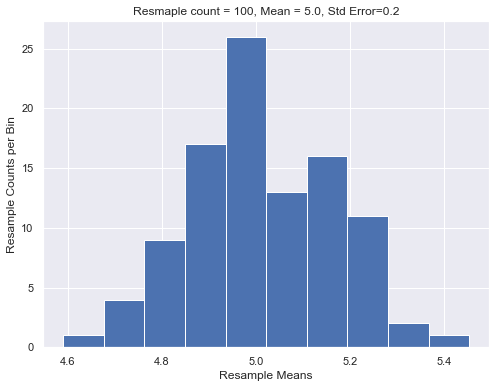

In [660]:
# Use the sample_data as a model for the population
population_model = sample_data
bootstrap_means = np.zeros(num_resamples)

# Resample the population_model 100 times, computing the mean each sample
for nr in range(num_resamples):
    bootstrap_sample = np.random.choice(population_model, size=resample_size, replace=True)
    bootstrap_means[nr] = np.mean(bootstrap_sample)

# Compute and print the mean, stdev of the resample distribution of means
distribution_mean = np.mean(bootstrap_means)
standard_error = np.std(bootstrap_means)
print('Bootstrap Distribution: center={:0.1f}, spread={:0.1f}'.format(distribution_mean, standard_error))

# Plot the bootstrap resample distribution of means
fig = plot_data_hist(bootstrap_means)

Notice that `standard_error` is just one measure of spread of the distribution of bootstrap resample means. You could have computed the `confidence_interval` using `np.percentile(bootstrap_means, 0.95)` and `np.percentile(bootstrap_means, 0.05)` to find the range distance values containing the inner 90% of the distribution of means.

### 4.3.2 Estimating Speed and Confidence
Let's continue looking at the National Park hiking data. Notice that some distances are negative because they walked in the opposite direction from the trail head; the data are messy so let's just focus on the overall trend.

In this exercise, you goal is to use boot-strap resampling to find the distribution of speed values for a linear model, and then from that distribution, compute the best estimate for the speed and the 90th percent confidence interval of that estimate. The speed here is the slope parameter from the linear regression model to fit distance as a function of time.

To get you started, we've preloaded `distance` and `time data`, together with a pre-defined `least_squares()` function to compute the speed value for each resample.

In [663]:
df = pd.read_csv('_datasets/hiking_data_neg.csv')
df.head()

,time,distance
0,0.00,0.993428
1,0.01,-0.256529
2,0.02,1.335377
3,0.03,3.106060
4,0.04,-0.388307


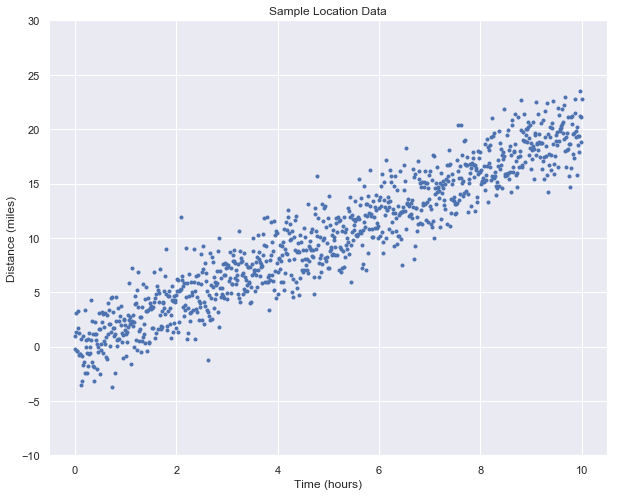

In [674]:
distances = df.distance.values
times = df.time.values

plt.figure(figsize=(10,8))
plt.scatter(times, distances, marker='.')
plt.ylim(-10,30)
plt.title('Sample Location Data')
plt.xlabel('Time (hours)')
plt.ylabel('Distance (miles)')
plt.show()

In [676]:
def least_squares(x,y):
    # prepare the means and deviations of the two variables
    x_dev = x - np.mean(x)
    y_dev = y - np.mean(y)

    # Complete least-squares formulae to find the optimal a0, a1
    a1 = np.sum(x_dev * y_dev) / np.sum( (x_dev**2) )
    a0 = np.mean(y) - (a1 * x_mean)
    
    return a0,a1

In [685]:
num_resamples = 1000
# Resample each preloaded population, and compute speed distribution
resample_speeds = np.zeros(num_resamples)
population_inds = np.arange(0, 99, dtype=int)
for nr in range(num_resamples):
    sample_inds = np.random.choice(population_inds, size=100, replace=True)
    sample_inds.sort()
    sample_distances = distances[sample_inds]
    sample_times = times[sample_inds]
    a0, a1 = least_squares(sample_times, sample_distances)
    resample_speeds[nr] = a1

# Compute effect size and confidence interval, and print
speed_estimate = np.mean(resample_speeds)
ci_90 = np.percentile(resample_speeds, [5, 95])
print('Speed Estimate = {:0.2f}, 90% Confidence Interval: {:0.2f}, {:0.2f} '.format(speed_estimate, ci_90[0], ci_90[1]))

Speed Estimate = 2.33, 90% Confidence Interval: 1.33, 3.42 


Notice that the speed estimate (the mean) falls inside the confidence interval (the 5th and 95th percentiles). Moreover, notice if you computed the standard error, it would also fit inside the confidence interval. Think of the standard error here as the 'one sigma' confidence interval. Note that this should be very similar to the summary output of a statsmodels ols() linear regression model, but here you can compute arbitrary percentiles because you have the entire speeds distribution.

### 4.3.3 Visualize the Bootstrap
Continuing where we left off earlier in this lesson, let's visualize the bootstrap distribution of speeds estimated using bootstrap resampling, where we computed a least-squares fit to the slope for every sample to test the variation or uncertainty in our slope estimation.

To get you started, we've preloaded a function `compute_resample_speeds(distances, times)` to do the computation of generate the speed sample distribution.

In [688]:
def compute_resample_speeds(distances, times, num_resamples = 1000):    
    # Resample each preloaded population, and compute speed distribution
    resample_speeds = np.zeros(num_resamples)
    population_inds = np.arange(0, 99, dtype=int)
    for nr in range(num_resamples):
        sample_inds = np.random.choice(population_inds, size=100, replace=True)
        sample_inds.sort()
        sample_distances = distances[sample_inds]
        sample_times = times[sample_inds]
        a0, a1 = least_squares(sample_times, sample_distances)
        resample_speeds[nr] = a1
    return resample_speeds

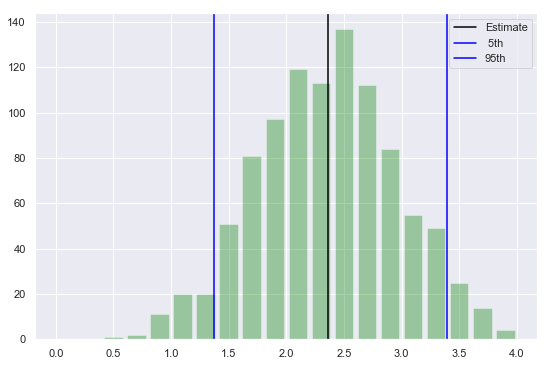

In [695]:
# Create the bootstrap distribution of speeds
resample_speeds = compute_resample_speeds(distances, times)
speed_estimate = np.mean(resample_speeds)
percentiles = np.percentile(resample_speeds, [5, 95])

# Plot the histogram with the estimate and confidence interval
fig, axis = plt.subplots(figsize=(9,6))
hist_bin_edges = np.linspace(0.0, 4.0, 21)
axis.hist(resample_speeds, hist_bin_edges, color='green', alpha=0.35, rwidth=0.8)
axis.axvline(speed_estimate, label='Estimate', color='black')
axis.axvline(percentiles[0], label=' 5th', color='blue')
axis.axvline(percentiles[1], label='95th', color='blue')
axis.legend()
plt.show()

Notice that vertical lines marking the 5th (left) and 95th (right) percentiles mark the extent of the confidence interval, while the speed estimate (center line) is the mean of the distribution and falls between them. Note the speed estimate is the mean, not the median, which would be 50% percentile.

## 4.4 Model Errors and Randomness


In [697]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/15-Model_Errors_and_Randomness.mp4" type="video/mp4">
</video>

### Types of Errors
1. Measurement error
    - e.g.: broken sensor, wrongly recorded measurements
2. Sampling bias
    - e.g: temperatures only from August, when days are hottest
3. Random chance

### Null Hypothesis
Question: Is our effect due a relationship or due to random chance?
Answer: check the Null Hypothesis.

In [699]:
df = pd.read_csv('_datasets/hiking_data.csv')
df.head()

,time,distance
0,0.00,0.132007
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.468150


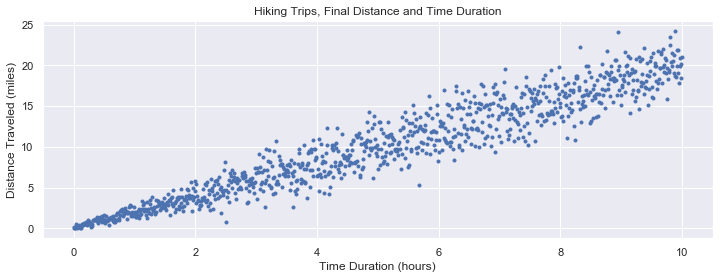

In [712]:
sample_distances = df.distance.values
sample_times = df.time.values

plt.figure(figsize=(12,4))
plt.scatter(df.time, df.distance, marker='.')
plt.title('Hiking Trips, Final Distance and Time Duration')
plt.xlabel('Time Duration (hours)')
plt.ylabel('Distance Traveled (miles)')
plt.show()

### 4.4.1 Test Statistics and Effect Size
How can we explore linear relationships with bootstrap resampling? Back to the trail! For each hike plotted as one point, we can see that there is a linear relationship between total distance traveled and time elapsed. It we treat the distance traveled as an "effect" of time elapsed, then we can explore the underlying connection between linear regression and statistical inference.

In this exercise, you will separate the data into two populations, or "categories": early times and late times. Then you will look at the **differences** between the total distance traveled within each population. This **difference** will serve as a **test statistic"**, and it's distribution will test the effect of separating distances by times.

In [727]:
def plot_test_statistic(x, figsize = (10,4)):
    
    distribution_mean = np.mean(x)
    standard_error = np.std(x)
    title = 'Test Statistic Distribution, Mean = {:0.2f}, Std Error={:0.2f}'.format(distribution_mean, standard_error)
    
    fig, axis = plt.subplots(figsize = figsize)   
   
    axis.hist(x, bins = 20)
    plt.title(title)
    plt.xlabel('Distance Differences, late - early')
    plt.ylabel('Bin Counts')
    return fig

Test Statistic: mean=10.02, stdev=4.61


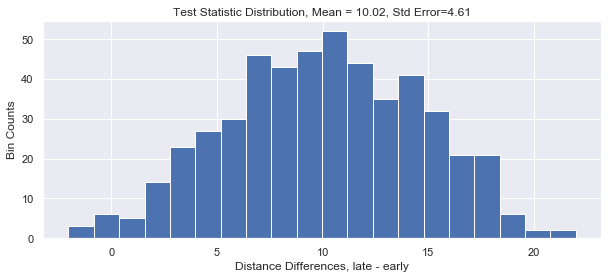

In [732]:
# Create two poulations, sample_distances for early and late sample_times.
# Then resample with replacement, taking 500 random draws from each population.
group_duration_short = sample_distances[sample_times < 5]
group_duration_long = sample_distances[sample_times > 5]
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)

# Difference the resamples to compute a test statistic distribution, then compute its mean and stdev
test_statistic = resample_long - resample_short
effect_size = np.mean(test_statistic)
standard_error = np.std(test_statistic)

# Print and plot the results
print('Test Statistic: mean={:0.2f}, stdev={:0.2f}'.format(effect_size, standard_error))
fig = plot_test_statistic(test_statistic)

Notice again, the test statistic is the difference between a distance drawn from short duration trips and one drawn from long duration trips. The distribution of difference values is built up from differencing each point in the early time range with one from the late time range. **The mean of the test statistic is not zero and tells us that there is on average a difference in distance traveled when comparing short and long duration trips**. Again, we call this the 'effect size'. The time increase had an effect on distance traveled. **The standard error of the test statistic distribution is not zero, so there is some spread in that distribution, or put another way, uncertainty in the size of the effect**.

### 4.4.2 Null Hypothesis
In this exercise, we formulate the null hypothesis as

> short and long time durations have no effect on total distance traveled.

We interpret the "zero effect size" to mean that if we shuffled samples between short and long times, so that two new samples each have a mix of short and long duration trips, and then compute the test statistic, on average it will be zero.

In this exercise, your goal is to perform the shuffling and resampling. Start with the predefined `group_duration_short` and `group_duration_long` which are the un-shuffled time duration groups.

In [733]:
# Shuffle the time-ordered distances, then slice the result into two populations.
shuffle_bucket = np.concatenate((group_duration_short, group_duration_long))
np.random.shuffle(shuffle_bucket)
slice_index = len(shuffle_bucket)//2
shuffled_half1 = shuffle_bucket[0:slice_index]
shuffled_half2 = shuffle_bucket[slice_index+1:]

# Create new samples from each shuffled population, and compute the test statistic
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic = resample_half2 - resample_half1

# Compute and print the effect size
effect_size = np.mean(test_statistic)
print('Test Statistic, after shuffling, mean = {}'.format(effect_size))

Test Statistic, after shuffling, mean = -0.00809385407185124


Notice that your effect size is not exactly zero because there is noise in the data. But the effect size is much closer to zero than before shuffling. Notice that if you rerun your code, which will generate a new shuffle, you will get slightly different results each time for the effect size, but `np.abs(test_statistic)` should be less than about 1.0, due to the noise, as opposed to the slope, which was about 2.0

### 4.4.3 Visualizing Test Statistics
In this exercise, you will approach the null hypothesis by comparing the **distribution of a test statistic** arrived at from two different ways.

First, you will examine two "populations", grouped by early and late times, and computing the test statistic distribution. Second, shuffle the two populations, so the data is no longer time ordered, and each has a mix of early and late times, and then recompute the test statistic distribution.

To get you started, we've pre-loaded the two time duration groups, `group_duration_short` and `group_duration_long`, and two functions, `shuffle_and_split()` and `plot_test_statistic()`.

In [762]:
def shuffle_and_split(group1,group2):
    # Shuffle the time-ordered distances, then slice the result into two populations.
    shuffle_bucket = np.concatenate((group1, group2))
    np.random.shuffle(shuffle_bucket)
    slice_index = len(shuffle_bucket)//2 # use // to convert it to an int
    shuffled_half1 = shuffle_bucket[0:slice_index]
    shuffled_half2 = shuffle_bucket[slice_index+1:]
    
    return shuffled_half1, shuffled_half2

def plot_test_statistic(x, label, figsize = (10,4)):
    
    distribution_mean = np.mean(x)
    standard_error = np.std(x)
    title = label+' Groups: Test Statistic Distribution, Mean = {:0.2f}, Std Error={:0.2f}'.format(distribution_mean, standard_error)
    
    fig, axis = plt.subplots(figsize = figsize)   
   
    axis.hist(x, bins = 20)
    plt.title(title)
    plt.xlim(-25,25)
    plt.xlabel('Test Statistic Values')
    plt.ylabel('Bin Counts')
    return fig

(500,)


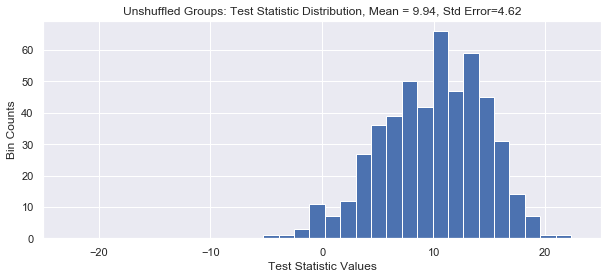

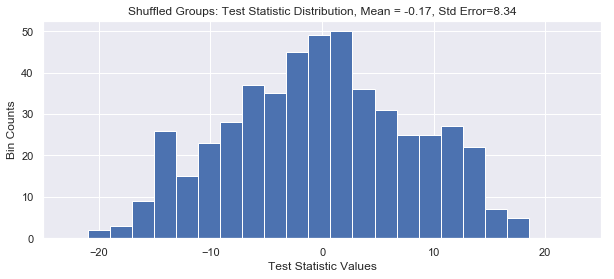

In [761]:
# From the unshuffled groups, compute the test statistic distribution
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)
test_statistic_unshuffled = resample_long - resample_short

# Shuffle two populations, cut in half, and recompute the test statistic
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic_shuffled = resample_half2 - resample_half1

# Plot both the unshuffled and shuffled results and compare
fig = plot_test_statistic(test_statistic_unshuffled, label='Unshuffled')
fig = plot_test_statistic(test_statistic_shuffled, label='Shuffled')

Notice that after you shuffle, the effect size went almost to zero and the spread increased, as measured by the standard deviation of the sample statistic, aka the 'standard error'. So shuffling did indeed have an effect. **The null hypothesis is disproven**. Time ordering does in fact have a non-zero effect on distance traveled. **Distance is correlated to time**.

### 4.4.4 Visualizing the P-Value
In this exercise, you will visualize the `p-value`, the chance that the effect (or "speed") we estimated, was the result of random variation in the sample. Your goal is to visualize this as the fraction of points in the shuffled test statistic distribution that fall to the right of the mean of the test statistic ("effect size") computed from the unshuffled samples.

To get you started, we've preloaded the `group_duration_short` and `group_duration_long` and functions `compute_test_statistic()`, `shuffle_and_split()`, and `plot_test_statistic_effect()`

In [789]:
def compute_test_statistic(short, long):
    resample_short = np.random.choice(short, size=500, replace=True)
    resample_long = np.random.choice(long, size=500, replace=True)
    test_statistic = resample_long - resample_short
    return test_statistic

def plot_test_stats_and_pvalue(test_statistic_unshuffled, test_statistic_shuffled, figsize = (12,6)):    
    # Compute the effect size for two population groups
    effect_size = np.mean(test_statistic_unshuffled)
    
    # Compute the p-value as the proportion of shuffled test stat values >= the effect size
    condition = test_statistic_shuffled >= effect_size
    p_value = len(test_statistic_shuffled[condition]) / len(test_statistic_shuffled)

    title = 'Test Statistic Distribution, Effect Size = {:0.2f}, p-value={:0.2f}'.format(effect_size, p_value)
    
    fig, axis = plt.subplots(figsize = figsize)   
   
    axis.hist(test_statistic_unshuffled, bins = 30, label = 'unshuffled', color = 'red', alpha=0.5)
    axis.hist(test_statistic_shuffled, bins = 30, label = 'shuffled', color = 'blue', alpha=0.5)
    axis.axvline(effect_size, label='effect_size', color='black')
    plt.title(title)
    plt.xlim(-25,25)
    plt.xlabel('Test Statistic Values')
    plt.ylabel('Bin Counts')
    plt.legend()
    return fig

In [767]:
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
shuffled_half2.shape

(499,)

The p-value is = 0.114


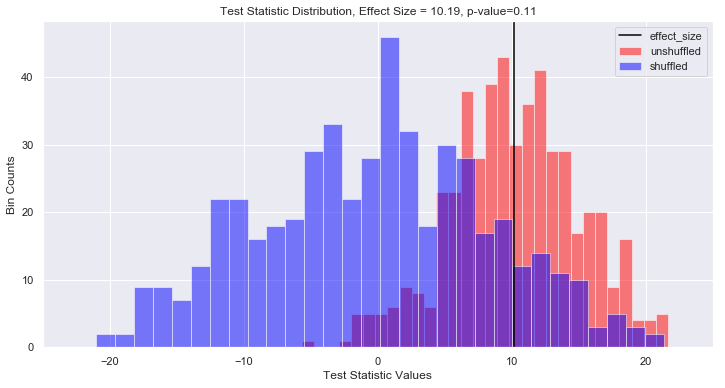

In [790]:
# Compute the test stat distribution and effect size for two population groups
test_statistic_unshuffled = compute_test_statistic(group_duration_short, group_duration_long)
effect_size = np.mean(test_statistic_unshuffled)

# Randomize the two populations, and recompute the test stat distribution
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
test_statistic_shuffled = compute_test_statistic(shuffled_half1, shuffled_half2)

# Compute the p-value as the proportion of shuffled test stat values >= the effect size
condition = test_statistic_shuffled >= effect_size
p_value = len(test_statistic_shuffled[condition]) / len(test_statistic_shuffled)

# Print p-value and overplot the shuffled and unshuffled test statistic distributions
print("The p-value is = {}".format(p_value))
fig = plot_test_stats_and_pvalue(test_statistic_unshuffled, test_statistic_shuffled)

Note that the entire point of this is compute a p-value to quantify the chance that our estimate for speed could have been obtained by random chance. On the plot, the unshuffle test stats are the distribution of speed values estimated from time-ordered distances. The shuffled test stats are the distribution of speed values computed from randomizing unordered distances. Values of the shuffled stats to the right of the mean non-shuffled effect size line are those that both (1) could have both occured randomly and (2) are at least as big as the estimate you want to use for speed.

## 4.5 Course Conclusion


In [791]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/16-Course_Conclusion.mp4" type="video/mp4">
</video>

### Exploring Linear Relationships
- Motivation by Example Predictions
- Visualizing Linear Relationships
- Quantifying Linear Relationships

### Building Linear Models
- Model Parameters
- Slope and Intercept
- Taylor Series
- Model Optimization
- Least-Squares

### Model Predictions
- Modeling Real Data
- Limitations and Pitfalls of Predictions
- Goodness-of-Fit

### Model Parameter Distributions
- modeling parameters as probability distributions
- samples, populations, and sampling
- maximizing likelihood for parametric shapes
- bootstrap resampling for arbitrary shapes
- test statistics and p-values